In [1]:
import sys
sys.path.append("/home/bl9/gempy/")
#sys.path.append("C:/Users/Fabian/gempy/")
import gempy as gp

%matplotlib inline
import pymc
import numpy as np
import math

from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D

from gempy import Topology

import vtk

from scipy.interpolate import griddata

In [2]:
# Importing the data from csv files and setting extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 50,50,50],
                         #path_f = "./input_data/Fab_TrapModel_Foliations.csv",
                         #path_i = "./input_data/Fab_TrapModel_Points.csv")
                         #path_f = "./input_data/FabLessPoints_Foliations.csv",
                         #path_i = "./input_data/FabLessPoints_Points1.csv")
                         path_f = "./input_data/Fab_Test_Foliations.csv",
                         path_i = "./input_data/Fab_Test_Points.csv")
geo_data.n_faults = 1

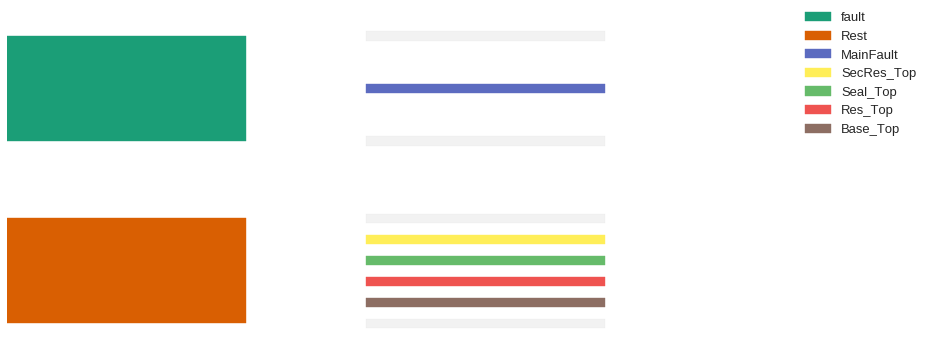

In [9]:
#gp.set_series(geo_data, {"fault":'MainFault', 
#                      "Rest":('Res_Base', 'Res_Top', 'Seal_Top', 'SecondaryReservoir')},
#                       order_series = ["fault","Rest",], order_formations=['MainFault', 
#                                         'SecondaryReservoir', 'Seal_Top', 'Res_Top','Res_Base',
#                                         ]) # for Fab_TrapModel
#
#gp.set_series(geo_data, {"fault":'MainFault', 
#                      "Rest":('Reservoir', 'Seal', 'SecondaryReservoir', 'Overlying')},
#                       order_series = ["fault","Rest",], order_formations=['MainFault', 
#                                         'Overlying', 'SecondaryReservoir', 'Seal','Reservoir',
# #                                        ]) 'for FabLessPoints

gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest":('Base_Top', 'Res_Top', 'Seal_Top', 'SecRes_Top')},
                       order_series = ["fault","Rest",], order_formations=['MainFault', 
                                         'SecRes_Top', 'Seal_Top', 'Res_Top','Base_Top',
                                         ]) #for Fab_Test

In [4]:
#geo_data.set_formation_number(['MainFault','Res_Base', 'Res_Top', 'Seal_Top', 'SecondaryReservoir'])

In [5]:
#gp.data_to_pickle(geo_data, 'BasicFault') #saving data to pickle

In [112]:
#geo_data.interfaces.head()
#gp.get_data(geo_data)

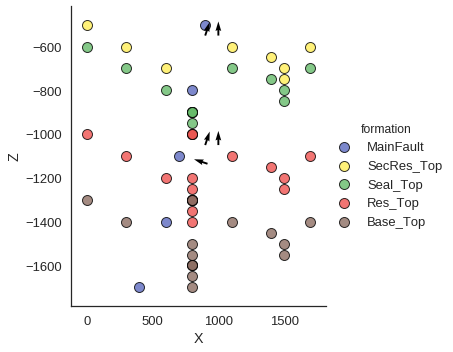

In [10]:
gp.plot_data(geo_data)

In [415]:
gp.plot_data_3D(geo_data)

In [11]:
# INTERPOLATION
interp_data = gp.InterpolatorInput(geo_data, 
                                   u_grade = [3, 3],
                                   compile_theano=True)

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32


In [12]:
# COMPUTATION OF THE MODEL
lith_sol, fault_sol = gp.compute_model(interp_data)

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.735872718292233e-12
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [13]:
# CREATING SURFACES FOR LAYERS
base_surf, base_surf_simp = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[0,1], potential_fault=fault_sol[0,1], n_formation = (interp_data.get_formation_number()['Base_Top']))
res_surf, res_surf_simp = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[0,1], potential_fault=fault_sol[0,1], n_formation = (interp_data.get_formation_number()['Res_Top']))
seal_surf, seal_surf_simp = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[0,1], potential_fault=fault_sol[0,1], n_formation = (interp_data.get_formation_number()['Seal_Top']))
sec_res_surf, sec_res_surf_simp = gp.get_surfaces(interp_data = interp_data, potential_lith=lith_sol[0,1], potential_fault=fault_sol[0,1], n_formation = (interp_data.get_formation_number()['SecRes_Top']))

In [111]:
#geo_data.get_formation_number().keys()

In [248]:
a,b = np.gradient(grid_z0, 40.81632614)
a = np.rot90(a,-1)

asign = np.sign(a)
asignchange = ((np.roll(asign, 1) - asign) != 0).astype(int)

#print(asignchange)
asignchange2 = ((np.roll(asign, -1) - asign) != 0).astype(int)


asc3 = np.logical_or(asignchange, asignchange2)

asc3[:,0]= 0
asc3[:,1]= 0
asc3[:,-1] = 0
asc3[-1,:] = 0
print(asc3)

bsign = np.sign(b)
bsignchange = ((np.roll(bsign, 1) - bsign) != 0).astype(int)
bsignchange2 = ((np.roll(bsign, -1) - bsign) != 0).astype(int)

bsc3 = np.logical_or(bsignchange, bsignchange2)

bsc3[:,0]= 0
bsc3[:,-1] = 0
bsc3[:,-2] = 0
bsc3[:,-3] = 0
bsc3[-1,:] = 0
#print(bsignchange)


asignchange = np.rot90(asignchange,1)
asc3 = np.rot90(asc3,1)

c = np.logical_and(asc3,bsc3)

[[False False  True False False False False False False False False False
  False False False False False False False False False False False False
  False  True  True False False False False False False False False False
  False False False False False False False False False False False  True
   True False]
 [False False  True False False False False False False False False False
  False False False False False False False False False False False False
  False  True  True False False False False False False False False False
  False False False False False False False False False False  True  True
  False False]
 [False False  True  True False False False False False False False False
  False False False False False False False False False False False False
  False  True  True False False False False False False False False False
  False False False False False False False False False False  True  True
  False False]
 [False False  True  True False False False False False False False

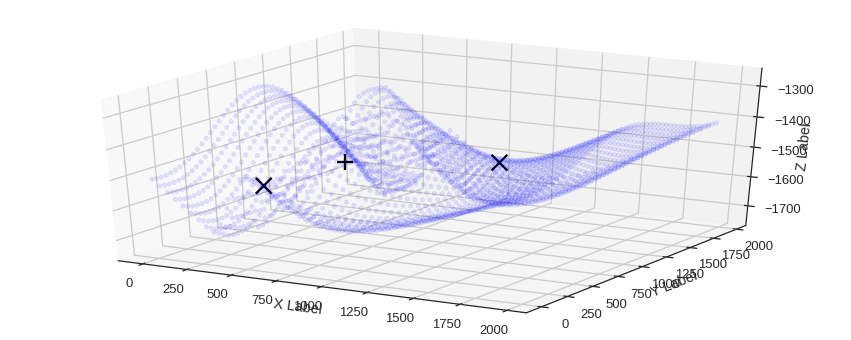

In [387]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
ax.scatter(pot_spill_Xcoord, pot_spill_Ycoord, pot_spill_Zcoord, c="black", alpha = 1, marker='x', s = 250)
ax.scatter(fault_leak_Xcoord, fault_leak_Ycoord, fault_leak_Zcoord, c="black", alpha = 1, marker='+', s = 250)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [333]:
grad_zero = saddle_p_all == 1
grid_z0[~grad_zero]= np.nan
grid_z0

array([[           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan],
       [           nan,            nan,            nan,            nan,
                   nan,

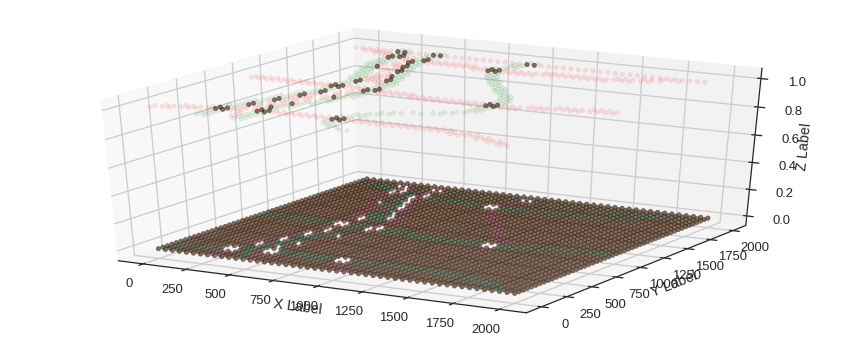

In [249]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
ax.scatter(grid_x, grid_y, asc3, c="r", alpha = 0.1)
ax.scatter(grid_x, grid_y, bsc3, c="g", alpha = 0.1)
ax.scatter(grid_x, grid_y, c, c="black", alpha = 0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

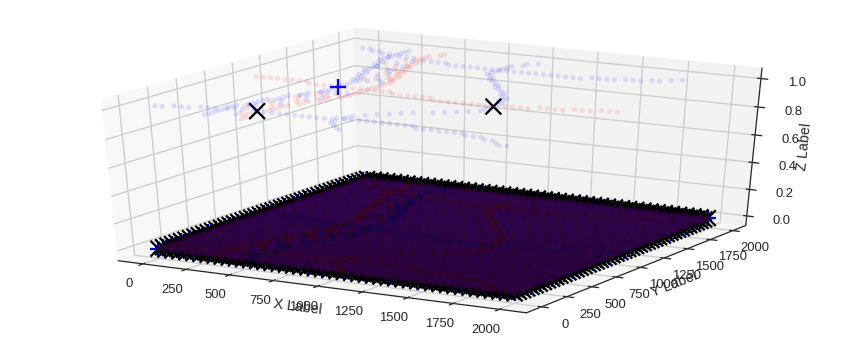

In [372]:
#fault_line = grid_minX[grid_maxX]
figsize(15,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
ax.scatter(grid_x, grid_y, grid_minY, c="b", alpha = 0.1)
ax.scatter(grid_x, grid_y, grid_maxY, c="r", alpha = 0.1)
ax.scatter(grid_x, grid_y, grid_minX, c="b", alpha = 0.1)
ax.scatter(grid_x, grid_y, grid_maxX, c="r", alpha = 0.1)
ax.scatter(grid_x, grid_y, spill_points, c="black", alpha = 1, marker='x', s = 250)
ax.scatter(grid_x, grid_y, leak_point, c="b", alpha = 1, marker='+', s= 250)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

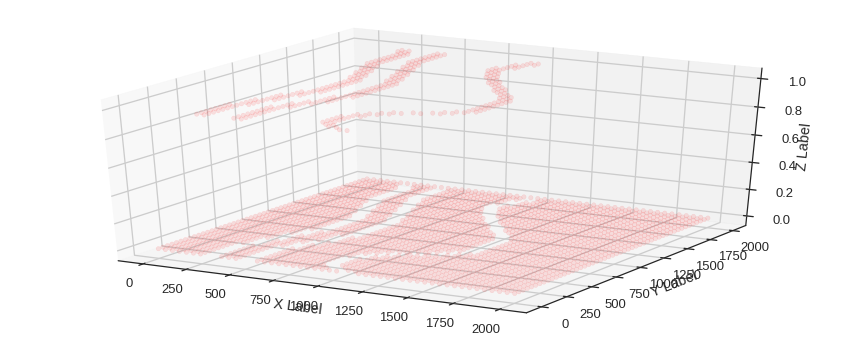

In [245]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
#ax.scatter(grid_x, grid_y, -a, c="r", alpha = 0.1)
#ax.scatter(grid_x, grid_y, -asignchange, c="g", alpha = 0.1)
ax.scatter(grid_x, grid_y, bsc3, c="r", alpha = 0.1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [29]:
#geo_data.get_formations()

In [6]:
geo_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'Overlying': 2,
 'Reservoir': 5,
 'Seal': 4,
 'SecondaryReservoir': 3}

In [16]:
gp.plot_surfaces_3D(geo_data, [base_surf, sec_res_surf, seal_surf, res_surf], 
                    [base_surf_simp, sec_res_surf_simp, seal_surf_simp, res_surf_simp], plot_data=True)

In [186]:
#sys.path.append("/home/bl9/gempy/gempy/")
#
#import Visualization 
#importlib.reload(Visualization)

<module 'Visualization' from '/home/bl9/gempy/gempy/Visualization.py'>

In [114]:
#w = Visualization.vtkVisualization(interp_data.geo_data_res, real_time=True )
#w.set_surfaces([overlying_surf, sec_res_surf, seal_surf, res_surf], 
#               [overlying_surf_simp, sec_res_surf_simp, seal_surf_simp, res_surf_simp],
#               #formations_names_l, formation_numbers_l,
#                )
#w.interp_data  = interp_data
#if True:
#    w.set_interfaces()
#    w.set_foliations()
#w.render_model()

In [174]:
gp.plot_surfaces_3D(geo_data, [res_surf], [res_surf_simp])

In [12]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'Overlying': 2,
 'Reservoir': 5,
 'Seal': 4,
 'SecondaryReservoir': 3}

In [166]:
grid_x, grid_y = np.meshgrid(np.unique(interp_data.geo_data_res.grid.grid[:, 0]),
                             np.unique(interp_data.geo_data_res.grid.grid[:, 1]))

#grid_z0 = griddata(res_surf[:,:2], res_surf[:,2],
#                   (grid_x, grid_y), method='linear')
(grid_x*rescale_f)-np.min(grid_x)*rescale_f

array([[0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       ..., 
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998],
       [0.0, 40.81632614135742, 81.63265228271507, ..., 1918.3673095703127,
        1959.1837158203123, 1999.9999999999998]], dtype=object)

In [165]:
grid_x, grid_y = np.meshgrid(np.unique(geo_data.grid.grid[:, 0]),
                             np.unique(geo_data.grid.grid[:, 1]))

grid_z0 = griddata(res_surf[:,:2], res_surf[:,2],
                   (grid_x, grid_y), method='linear')

grid_x

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [   40.81632614,    40.81632614,    40.81632614, ...,
           40.81632614,    40.81632614,    40.81632614],
       [   81.63265228,    81.63265228,    81.63265228, ...,
           81.63265228,    81.63265228,    81.63265228],
       ..., 
       [ 1918.36730957,  1918.36730957,  1918.36730957, ...,
         1918.36730957,  1918.36730957,  1918.36730957],
       [ 1959.18371582,  1959.18371582,  1959.18371582, ...,
         1959.18371582,  1959.18371582,  1959.18371582],
       [ 2000.        ,  2000.        ,  2000.        , ...,
         2000.        ,  2000.        ,  2000.        ]])

In [139]:
interp_data.geo_data_res.interfaces['X'][interp_data.geo_data_res.interfaces['formation'] == 'Res_Top']*rescale_f

27    1850.38
28    1850.38
29    1850.38
30    1850.38
31    1850.38
32    1850.38
33    1850.38
34    1050.38
35    1350.38
36    1650.38
37    1850.38
38    2150.38
39    2450.38
40    2550.38
41    1850.38
42    2550.38
43    2750.38
Name: X, dtype: object

In [153]:
x_ref=(interp_data.extent_rescaled['X'].values[1]-interp_data.extent_rescaled['X'].values[0])
bla = np.ones_like(grid_x)
bla = bla*x_ref
(bla-grid_x)*rescale_f

array([[  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       ..., 
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06],
       [  2.00000000e+03,  -1.53102039e+05,  -3.08204079e+05, ...,
         -7.28779578e+06,  -7.44289812e+06,  -7.59800000e+06]])

2014.0

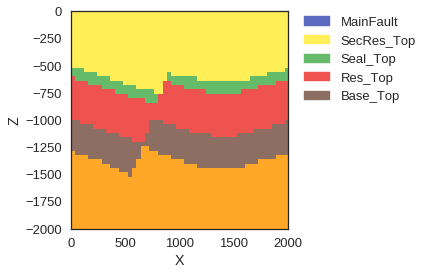

In [126]:
#%matplotlib notebook
%matplotlib inline
gp.plot_section(geo_data, lith_sol[0,0], 25, plot_data=0)

In [18]:
resolution = 50
model_size = 2000
scale_factor = (model_size/resolution) #original grid in [m]/grid resolution --> what if model not cubic?

In [403]:
# SPILL AND LEAK POINT FUNCTIONS

# Finding the spill point
#def spill_point(res_surface):
#    mini = argrelextrema(res_surface[:,2], np.less, order=10)
#    minima = np.array(list(zip(np.take(res_surface[:,1], mini[0]), np.take(res_surface[:,0], mini[0]), np.take(res_surface[:,2], mini[0]))))
#    fault_thresh = minima[:,1] > 700 #taking only relevant side by setting a threshold visually estimated, best: 20
#    spill_min_line = minima[fault_thresh]
#    spill_pos = np.array(np.argmax(spill_min_line[:,2]))
#    spill_z = np.take(spill_min_line[:,2], spill_pos)
#    spill_p = np.array([np.take(spill_min_line[:,1], spill_pos), np.take(spill_min_line[:,0],
#                                spill_pos), np.take(spill_min_line[:,2], spill_pos)])
#    
#    # Horizontal plane defined by z-pos of spill
#    if True:
#        spill_bottom = np.ones_like(res_surface)
#        spill_bottom[:,0] = res_surface[:,0]
#        spill_bottom[:,1] = res_surface[:,1]
#        spill_bottom[:,2] = spill_z    
#    
#    return spill_z, spill_p, spill_min_line, spill_bottom
#
## Finding the leak point ( critically inefficient method! takes 10s!)
#def leak_point(res_surface):
#    counter = 0
#    # Creating empty lists and arrays to save values
#    xvals = []
#    yvals = []
#    zvals = []
#    leak_min = np.empty((0,3), dtype=int)
#    #leak_min = np.empty([3,], dtype=int)
#    
#    for i in np.unique(res_surface[:,1]):
#        
#    #while counter < model_size:
#        #print(counter)
#        for e in res_surface:
#            # Looking at a slice along y-axis for y = e[1] = counter, 
#            # and appending x,y,z-values into lists
#            # This is a way of RESORTING the array as needed
#            #if int(e[1]) == counter:
#            if e[1] == i:
#                xvals.append(e[0])
#                yvals.append(e[1])
#                zvals.append(e[2])
#            
#        # Saving x,y,z-values as lists/arrays      
#        zvals = np.array(zvals)
#        yvals = np.array(yvals)
#        xvals = np.array(xvals)
#
#        # Looking fore minima positions in z-array
#        min_pos = argrelextrema(zvals, np.less, order=10)
#        
#        # Saving x,y,z-positions of minima
#        ypos = yvals[min_pos]
#        xpos = xvals[min_pos]
#        mins = zvals[min_pos]
#        
#        # Condition: Check if any minimum was found and if any data is given at y = counter
#        # If no minimum found, restart loop at next iteration
#        # This way, we can work with the data that coesn't cover every 1 step along the model
#        # (such as the surface vertices)
#        if len(mins) == 0:
#            counter += 1
#            #lists have to be emptied again
#            xvals = []
#            yvals = []
#            zvals = []
#            continue
#        
#        #np.append(leak_min, mins) -----> what did I use this for?
#        
#        # Create and array element to save coordinates of minima
#        mins_pos = np.array(list(zip(xpos, ypos, mins)))
#        # Save minima of slice into array of ALL minima
#        leak_min = np.vstack((leak_min, mins_pos))
#
#        # Empty lists for next iteration
#        xvals = []
#        yvals = []
#        zvals = []
#    
#        counter += 1
#        
#    #leak_min = np.delete(leak_min, 0, 0) #what does this do???
#    
#    # Result of the loop above is one or SEVERAL lines of minima ("leak lines")
#    # only want to look at the line bordering the fault surface
#    # need for a general function/method to limit to only that line!
#    # For now: Taking only relevant side by setting a threshold that is visually estimated
#    near_fault_thresh = leak_min[:,0] < 1500
#    leak_line = leak_min[near_fault_thresh]
#    
#    # The highest point of the leak line is the leak point!
#    leak_pos = np.array(np.argmax(leak_line[:,2]))
#    leak_z = np.take(leak_line[:,2], leak_pos)
#
#    # Full coordinates of the leak point as array element
#    leak_p = np.array([np.take(leak_line[:,1], leak_pos), np.take(leak_line[:,0], leak_pos), np.take(leak_line[:,2], leak_pos)])
#    
#    # Creating a horizontal plane defined by the leak point z-position, in shape of res_surface
#    leak_bottom = np.ones_like(res_surface)
#    leak_bottom[:,0] = res_surface[:,0]
#    leak_bottom[:,1] = res_surface[:,1]
#    leak_bottom[:,2] = leak_z
#   
#    return leak_z, leak_p, leak_line, leak_bottom

In [206]:
def spill_leak_P(interp_data, res_surf):    
    grid_x, grid_y = np.meshgrid(np.unique(interp_data.geo_data_res.grid.grid[:, 0]),
                             np.unique(interp_data.geo_data_res.grid.grid[:, 1]))

    grid_x=(grid_x*rescale_f)-(np.min(grid_x)*rescale_f)
    grid_y=(grid_y*rescale_f)-(np.min(grid_y)*rescale_f)
    
    grid_z0 = griddata(res_surf[:,:2], res_surf[:,2],
                       (grid_x, grid_y), method='linear')
    
    rel_order = 1
    
    #check grid_z0 for max and min in directions x and y
    #direction x
    minX1,minX2 = argrelextrema(grid_z0,np.less,order=rel_order,axis=1)
    maxX1,maxX2 = argrelextrema(grid_z0,np.greater,order=rel_order,axis=1)
    grid_minX = np.zeros_like(grid_z0)
    grid_minX[minX1,minX2]=1
    grid_maxX = np.zeros_like(grid_z0)
    grid_maxX[maxX1,maxX2]=1
    
    #direction y
    minY1,minY2 = argrelextrema(grid_z0,np.less,order=rel_order,axis=0)
    maxY1,maxY2 = argrelextrema(grid_z0,np.greater,order=rel_order,axis=0)
    grid_minY = np.zeros_like(grid_z0)
    grid_minY[minY1,minY2]=1
    grid_maxY = np.zeros_like(grid_z0)
    grid_maxY[maxY1,maxY2]=1
    
    #check for saddle points
    saddle_p1 = np.logical_and(grid_minX,grid_maxY)
    saddle_p2 = np.logical_and(grid_minY,grid_maxX)
    saddle_p_all= np.logical_or(saddle_p1, saddle_p2)
    
    # this should find saddle points relative to X and Y directions
    # problem of finding other points in a rotated direction?
    
    
    # fault leak line
    fleak_line = np.copy(grid_minX)
    fleak_line[:,15:]=0 # 15 chosen as threshold --> better method?
    
    # distinguish anticlinal spill points from fault leak points:
    fault_leak_point = np.logical_and(fleak_line,saddle_p_all)
    
    spill_points = saddle_p_all - fault_leak_point
    
    # leak and spill point 3D coordinates
    pot_spill_Xcoord = grid_x[spill_points]
    pot_spill_Ycoord = grid_y[spill_points]
    pot_spill_Zcoord = grid_z0[spill_points]
    
    pot_spill_3Dcoord = np.array(list(zip(pot_spill_Xcoord, pot_spill_Ycoord, pot_spill_Zcoord)))
    print(pot_spill_3Dcoord)
    
    fault_leak_Xcoord = grid_x[fault_leak_point]
    fault_leak_Ycoord = grid_y[fault_leak_point]
    fault_leak_Zcoord = grid_z0[fault_leak_point]
    
    fault_leak_3Dcoord = np.array(list(zip(fault_leak_Xcoord, fault_leak_Ycoord, fault_leak_Zcoord)))
    
    max_spill_pos = pot_spill_3Dcoord[2,:].argmax(axis=0)
    anticline_spill_3Dcoord = pot_spill_3Dcoord[max_spill_pos,:]
    print('SP',anticline_spill_3Dcoord)
    
    print('LP',fault_leak_3Dcoord)
    if fault_leak_3Dcoord.size == 0:
        print('No fault leak point found!')
        return anticline_spill_3Dcoord
    else:   
        return anticline_spill_3Dcoord, fault_leak_3Dcoord[0]

In [177]:
# MASKING FUNCTIONS

# Masking function that confines to voxels which are part fo the reservoir formation,
# in the footwall side and above the z-horizontal defined by the spill or leak point
def res_mask(lith,fault, bottom_z, formation_nr):
    mask = np.ones_like(lith)
    mask[~formation_nr] = False
    mask[fault.astype(bool)] = False
    bottom_z = bottom_z/scale_factor
    mask = mask.reshape(50,50,50)
    mask[:,:,:bottom_z] = False
    mask = mask.reshape(125000,)
    return mask

# Function that sets all voxels of lith_block which are equal (or closest to) to the spill_z
# horizontal as belonging to the overlying seal 
# (the voxels is located on the border of reservoir and seal):
def set_spill_to_seal(geo_data, lith, max_z):
    lith_spill = np.argmin(np.abs(geo_data.grid.grid[:, 2]+np.abs(max_z)))
    bol_lith_spill = geo_data.grid.grid[:, 2] == geo_data.grid.grid[:, 2][lith_spill]
    lith[bol_lith_spill] = 6
    return lith
        ### Hpw to check in here, if single spill voxel = reservoir (5)??? Need x and y pos?

# Masking that confines the volume to ONLY those reservoir traps (from res_mask)
# that are NOT connected to the borders of the model (open system)
# Traps defined as CLOSED systems
def topo_analysis(lith, fault):
    fig = plt.figure()
    traps = []
    # Padding of lith- and fault-block (creating border sections, formation number = 8)
    lith_pad = (np.pad(lith.reshape(50,50,50), 1, 'constant', constant_values = (8,8)))
    fault_pad = (np.pad(fault.reshape(50,50,50), 1, 'constant', constant_values = (8,8)))
    topo = Topology.Topology(lith_pad, fault_pad)
    #topo.draw_section(25)
    topo_block = topo.labels
    # Finding sections which are possible traps in the reservoir (formation number = 7)
    topo_keys = [int(k) for k in topo.lith_to_labels_lot["7"].keys()]
    pad_keys = [int(p) for p in topo.lith_to_labels_lot["8"].keys()]
    #over_keys = [int(o) for o in topo.lith_to_labels_lot["2"].keys()]
    #sec_res_keys = [int(sr) for sr in topo.lith_to_labels_lot["3"].keys()]
    bool_block = np.zeros_like(topo_block)
    # Check for each possible trap section, if it is connected to a border
    for tk in topo_keys:
        print('Checking Section:', tk)
        # Saving enclosed sections as traps
        if topo.check_adjacency(tk, pad_keys[0]) == False:
            print("TRAP FOUND, section:", tk)
            traps.append(tk)
    if traps == []:
        print('No trap found! =(')
    else:
        for i in traps:
            # Creating a mask from the trap sections in the label block
            top_bool = topo_block == i
            bool_block[top_bool] = True
            ### Extra check for juxtaposition with layers above seal
            #if topo.check_adjacency(i, over_keys[0]) == False and topo.check_adjacency(i, sec_res_keys[0]) == False:
            #    print('Trap sealed upwards.')
            #    top_bool = topo_block == i
            #    bool_block[top_bool] = True
            #else: 
            #    print("Juxtaposition, no trap sealing.")
    # Removing padding
    trap_mask = bool_block[1:-1,1:-1,1:-1]
    #plt.imshow(trap_mask[:,25,:].T, origin="lower")
    #plt.show()
    return trap_mask

In [178]:
# MAIN FUNCTION: Calculation of maximum fill volume in reservoir traps

def max_trap_vol(interp_data, lith, fault, res_surface, fault_sealing):
    # calculate spill point
    spill_point = spill_leak_P(interp_data, res_surface)[0]
    print('Spill Point:',spill_point)
    spill_z = spill_point[2]
    #spill_z, spill_p, spill_min_line, spill_bottom = spill_point(res_surface)
    # calculate leak point
    leak_point = spill_leak_P(interp_data, res_surface)[1]
    print('Leak Point:',leak_point)
    leak_z = leak_point[2]
    #leak_z, leak_p, leak_line, leak_bottom = leak_point(res_surface)
    bottom_surface = np.ones_like(res_surface)
    
    #PLOTTING OF SPILL, LEAK AND BOTTOM POSSIBLE HERE:
    #plot_spill(res_surface, spill_min_line, spill_p)
    #plot_leak(res_surface, leak_line, leak_p)
    #plot_trap(res_surface, bottom_surface, spill_p, leak_p)
    #PRINTING OF SPILL, LEAK:
    #print('Spill_Z:', spill_z)
    #print('Leak_Z:', leak_z)
    
    # Check for "down-to" z-horizon, maximum depth of reservoir
    # Check for fault sealing and subsequent relevance of leak point
    max_z = np.max([spill_z, leak_z])
    if fault_sealing == True:
        if max_z == spill_z:
            print("Spill point defines trap.")
            print("Fault is sealing. Down to spill.")
            #bottom_surface = spill_bottom
        else:
            print("Fault leak point above spill point.")
            max_z = spill_z
            print("...but fault sealing. Down to spill.")
            #bottom_surface = spill_bottom
    else:
        if max_z == spill_z:
            print("Spill point defines trap.")
            print("Fault is pathway. Down to spill.")
            #bottom_surface = spill_bottom
        else:
            print("Fault leak point above spill point.")
            print("Cross-fault leakage. Down to leak.")
            #bottom_surface = leak_bottom      
    
    #print('Max_Z:', max_z)
    
    res_nr = lith == 5 #interp_data.get_formation_number()['Reservoir']
    pre_trap_mask = res_mask(lith, fault, max_z, res_nr)
          
    # volume cells for counting
    vol_cells = 0      
    
    pre_trap_mask_bool = (pre_trap_mask == True)
    # Check if there is anaything in the reservoir mask at all
    if np.count_nonzero(pre_trap_mask_bool) == 0:
        print("No res_formation above max_z!")
        return 0, lith, bottom_surface, pre_trap_mask
    else:
        lith[pre_trap_mask_bool] = 7                           # setting reservoir above bottom on footwall side 
                                                            # (incl. outside trap) to formation value = 7  
        if max_z == spill_z:
            lith = set_spill_to_seal(geo_data, lith, max_z)
        
        #test = lith.reshape(125000)                       
        #for i in range(len(test)):                         #to test pre-trap-masking volume
        #    if test[i] == 7:
        #        vol_cells +=1
        #res_vol = ((scale_factor)**3) * vol_cells 
        #print("VOLUME INCLUDING OUTSIDE TRAP:" ,res_vol)
        
        final_trap_mask = topo_analysis(lith, fault)
        lith[pre_trap_mask_bool] = 5
        lith[final_trap_mask] = 9                         # setting final trap to formation value = 9
        vol_cells = np.count_nonzero(final_trap_mask)
        
        #calulate volume from cells
        trap_vol = ((scale_factor)**3) * vol_cells 
        
        #return the maximum reservoir volume
        return trap_vol, lith, bottom_surface, final_trap_mask

In [179]:
# PLOTTING FUNCTIONS: Spill and leak point visualization
def plot_spill_leak(res_surface, spill_point, leak_point, grid_x, grid_y, grid_z0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(grid_x, grid_y, grid_z0, c="b", alpha = 0.1)
    ax.scatter(spill_point[0],spill_point[1],spill_point[2], c="black", alpha = 1, marker='x', s = 250)
    ax.scatter(leak_point[0],leak_point[1],leak_point[2], c="black", alpha = 1, marker='+', s = 250)
        
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()

#def plot_spill(res_surface, spill_min_line, spill_p):
#    fig = plt.figure()
#    ax = fig.add_subplot(111, projection='3d')
#    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
#    ax.scatter(-spill_min_line[:,0], -spill_min_line[:,1], spill_min_line[:,2], c='r', s = 50)
#    ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 200)
#    
#    ax.set_xlabel('X Label')
#    ax.set_ylabel('Y Label')
#    ax.set_zlabel('Z Label')
#
#    plt.show()
#
#def plot_leak(res_surface, leak_line, leak_p):
#    fig = plt.figure()
#    ax = fig.add_subplot(111, projection='3d')
#    
#    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
#    ax.scatter(-leak_line[:,1], -leak_line[:,0], leak_line[:,2], c='r', s = 50)
#    ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='green', s = 200)
#    
#    ax.set_xlabel('X Label')
#    ax.set_ylabel('Y Label')
#    ax.set_zlabel('Z Label')
#    
#    plt.show()
#    
#def plot_trap(res_surface, bottom_surface, spill_p, leak_p):
#    fig = plt.figure()
#    ax = fig.add_subplot(111, projection='3d')
#    ax.scatter(-bottom_surface[:,1], -bottom_surface[:,0], bottom_surface[:,2], c="r", alpha = 0.05)
#    ax.scatter(-res_surface[:,1], -res_surface[:,0], res_surface[:,2], c="b", alpha = 0.1)
#    ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 1000)
#    ax.scatter(-leak_p[1], -leak_p[0], leak_p[2], c='green', s = 1000)
#
#    
#    ax.set_xlabel('X Label')
#    ax.set_ylabel('Y Label')
#    ax.set_zlabel('Z Label')
#    
#    plt.show()

In [180]:
sec_res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'SecRes_Top']['Z']
seal_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Seal_Top']['Z']
res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Res_Top']['Z']
base_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Base_Top']['Z']

res_len = len(interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Res_Top']['Z'])

In [184]:
rescale_f = interp_data.rescaling_factor

# SETTING Z-UNCERTAINTIES FOR EACH LAYER TOP

#z_unc_over = pymc.Normal('z_unc_over_bot', 0, 1./0.0001)
#z_unc_seal_top = pymc.Normal('z_unc_seal_top', 0, 1./0.0003)
#z_unc_res_top = pymc.Normal('z_unc_res_top', 0, 1./0.0005)
#z_unc_res_bot = pymc.Normal('z_unc_res_bot', 0, 1./0.0008)

std_secres_top = 10
std_seal_top = 20
std_res_top = 40
std_base_top = 60

z_unc_secres_top = pymc.Normal('z_unc_secres_top', 0, 1./np.square(std_over/rescale_f))
z_unc_seal_top = pymc.Normal('z_unc_seal_top', 0, 1./np.square(std_seal_top/rescale_f))
z_unc_res_top = pymc.Normal('z_unc_res_top', 0, 1./np.square(std_res_top/rescale_f))
z_unc_base_top = pymc.Normal('z_unc_base_top', 0, 1./np.square(std_res_bot/rescale_f))

#z_unc_over = 0
#z_unc_seal_top = 0
#z_unc_res_top = 
#z_unc_res_bot = 0

# FAULT SEALING UNCERTAINTY (True = fault sealing)
fault_sealing = pymc.Bernoulli('fault_sealing_unc',p=.5)

In [185]:
# Boolean conditions to find data points for each formation
base_top_cond = interp_data.geo_data_res.interfaces['formation'] == 'Base_Top'
res_top_cond = interp_data.geo_data_res.interfaces['formation'] == 'Res_Top'
seal_top_cond = interp_data.geo_data_res.interfaces['formation'] == 'Seal_Top'
secres_top_cond = interp_data.geo_data_res.interfaces['formation'] == 'SecRes_Top'

In [207]:
# MODLE FUNCTIONS 

# Updating of interp_data points with new z-values resulting from z-positional uncertainty
@pymc.deterministic
def interp_unc(value=0, z_unc_secres_top = z_unc_secres_top, z_unc_seal_top=z_unc_seal_top, 
                  z_unc_res_top = z_unc_res_top, z_unc_base_top = z_unc_base_top):
    new_z_secres_top = sec_res_z + z_unc_secres_top
    new_z_seal_top = seal_z + z_unc_seal_top
    new_z_res_top = res_z + z_unc_res_top
    new_z_base_top = base_z + z_unc_base_top   
    print('Z-Variations top to bottom:', z_unc_secres_top, z_unc_seal_top, z_unc_res_top, z_unc_base_top)
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'SecRes_Top'] = new_z_secres_top
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Seal_Top'] = new_z_seal_top
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Res_Top'] = new_z_res_top
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Base_Top'] = new_z_base_top
    return interp_data

# Calculating formation thickness based on z-difference between a bottom and top point on the footwall (fw)

# This is done using interp_data, where X,Y and Z-values are rescaled according to the rescaling_factor.
# Value[1] of extent_rescaled equals the maximum extent of model (here: 2000).
# So if we want to find the rescaled X-position 1600, we simply calculated 2000-400 rescaled (see fw_x_cond)
# Y_mid defines that we are looking at a central position (in y-direction) in the model.
# The difference in z between two points has to be rescaled to the original scale again.

# Reservoir thickness
@pymc.deterministic
def res_th(interp_data=interp_unc):
    rescale_f = interp_data.rescaling_factor
    fw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (400/rescale_f))
    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
    points_fw = interp_data.geo_data_res.interfaces[fw_x_cond]
    points_fw = points_fw[y_mid]   
    fw_rb_z = points_fw[base_top_cond]['Z'].values*rescale_f
    fw_sb_z = points_fw[res_top_cond]['Z'].values*rescale_f
    return np.abs(fw_sb_z-fw_rb_z)

#Seal thickness
@pymc.deterministic
def seal_th(interp_data=interp_unc):
    rescale_f = interp_data.rescaling_factor
    fw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (400/rescale_f))
    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
    points_fw = interp_data.geo_data_res.interfaces[fw_x_cond]
    points_fw = points_fw[y_mid]   
    fw_r2b_z = points_fw[seal_top_cond]['Z'].values*rescale_f
    fw_sb_z = points_fw[secres_top_cond]['Z'].values*rescale_f
    return np.abs(fw_r2b_z-fw_sb_z)

# Secondary reservoir thickness
@pymc.deterministic
def sec_res_th(interp_data=interp_unc):
    rescale_f = interp_data.rescaling_factor
    fw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (400/rescale_f))
    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
    points_fw = interp_data.geo_data_res.interfaces[fw_x_cond]
    points_fw = points_fw[y_mid]   
    fw_r2b_z = points_fw[seal_top_cond]['Z'].values*rescale_f
    fw_ob_z = points_fw[secres_top_cond]['Z'].values*rescale_f
    return np.abs(fw_ob_z-fw_r2b_z)

# Volumetric calculation 
@pymc.deterministic
def structural_model(interp_data=interp_unc, fault_sealing=fault_sealing):
    lith_sol, fault_sol = gp.compute_model(interp_data)
    lith_block = lith_sol[0,0]
    fault_block = fault_sol[0,0]  
    res_top_surf, res_top_surf_simp = gp.get_surfaces(
                                          interp_data = interp_data, potential_lith=lith_sol[0,1], 
        potential_fault=fault_sol[0,1], n_formation = 3)#interp_data.get_formation_number()['Seal'])
    max_vol, lith_sol[0,0], bottom, trap = max_trap_vol(interp_data, lith_block, fault_block, res_top_surf, fault_sealing)
    print("Maximum reservoir volume: %s m³" % max_vol)
    #gp.plot_section(geo_data, lith_sol[0,0], 5, plot_data =1)
    gp.plot_section(geo_data, lith_sol[0,0], 25, plot_data =1)
    #gp.plot_section(geo_data, lith_sol[0,0], 45, plot_data =1)
    gp.plot_section(geo_data, trap, 25, plot_data =1)
    return lith_sol, fault_sol, max_vol

Z-Variations top to bottom: -0.00388275401765907 -0.0067736827278695195 0.015263833343065187 -0.014616709298305986


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:57: UserWarning: Boolean Serie

[[  734.69384766   204.08163452  -957.56624473]
 [ 1387.75512695   897.95916748  -801.84435071]
 [  734.69384766   979.59185791  -896.09277074]
 [  734.69384766  1714.2857666  -1040.28697202]]
SP [ 1387.75512695   897.95916748  -801.84435071]
LP []
No fault leak point found!
Spill Point: 1387.75512695


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


IndexError: invalid index to scalar variable.

In [106]:
iterations = 10

In [107]:
model = pymc.Model([interp_unc, z_unc_res_top, z_unc_base_top, z_unc_seal_top, z_unc_secres_top, fault_sealing, structural_model, res_th, seal_th, sec_res_th])

Z-Variations top to bottom: -0.0024868147450843687 -0.00018761690627220207 0.009511538663344208 0.004603431262219842
Z-Variations top to bottom: -0.003063627820635811 -0.00018761690627220207 0.009511538663344208 0.004603431262219842
Z-Variations top to bottom: -0.003063627820635811 -0.00018761690627220207 0.016472302476929563 0.004603431262219842
Z-Variations top to bottom: -0.003063627820635811 -0.00018761690627220207 0.016472302476929563 0.004366519452637589

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Serie


Z-Variations top to bottom: -0.003063627820635811 -0.00018761690627220207 0.016472302476929563 0.004366519452637589


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.8962012583337094e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:43: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 17
No trap found! =(
Maximum reservoir volume: 0.0 m³
 [-------          20%                  ] 2 of 10 complete in 11.9 secZ-Variations top to bottom: -0.003063627820635811 0.0012032049583551197 0.016472302476929563 0.004366519452637589
Z-Variations top to bottom: 0.00046546830002966574 0.0012032049583551197 0.016472302476929563 0.004366519452637589
Z-Variations top to bottom: 0.00046546830002966574 0.0012032049583551197 0.011822490658168677 0.004366519452637589
Z-Variations top to bottom: 0.00046546830002966574 0.0012032049583551197 0.011822490658168677 0.004083720357597746
Z-Variations top to bottom: 0.00046546830002966574 0.0012032049583551197 0.011822490658168677 0.004083720357597746


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.983658888873087e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 16
TRAP FOUND, section: 16
Checking Section: 19
Maximum reservoir volume: 20032000.0 m³
 [-----------      30%                  ] 3 of 10 complete in 23.2 secZ-Variations top to bottom: 0.00046546830002966574 0.0030589488817678347 0.011822490658168677 0.004083720357597746
Z-Variations top to bottom: 0.003989553349604349 0.0030589488817678347 0.011822490658168677 0.004083720357597746
Z-Variations top to bottom: 0.00046546830002966574 0.0030589488817678347 0.008143209123087646 0.004083720357597746
Z-Variations top to bottom: 0.00046546830002966574 0.0030589488817678347 0.008143209123087646 -0.002283123082791677
Z-Variations top to bottom: 0.00046546830002966574 0.0030589488817678347 0.008143209123087646 -0.002283123082791677


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2132356776593171e-15
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 249
TRAP FOUND, section: 249
Checking Section: 267
TRAP FOUND, section: 267
Checking Section: 203
TRAP FOUND, section: 203
Checking Section: 303
TRAP FOUND, section: 303
Checking Section: 330
TRAP FOUND, section: 330
Checking Section: 382
TRAP FOUND, section: 382
Checking Section: 115
Checking Section: 319
TRAP FOUND, section: 319
Checking Section: 295
TRAP FOUND, section: 295
Checking Section: 261
TRAP FOUND, section: 261
Checking Section: 291
TRAP FOUND, section: 291
Checking Section: 213
TRAP FOUND, section: 213
Checking Section: 236
TRAP FOUND, section: 236
Checking Section: 231
TRAP FOUND, section: 231
Checking Section: 292
TRAP FOUND, section: 292
Checking Section: 352
TRAP FOUND, section: 352
Checking Section: 234
TRAP FOUND, section: 234
Checking Section: 388
TRAP FOUND, section: 388
C

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9915704502215803e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 16
TRAP FOUND, section: 16
Checking Section: 19
Maximum reservoir volume: 16064000.0 m³
 [-----------------50%                  ] 5 of 10 complete in 47.0 secZ-Variations top to bottom: -0.0030900278329757222 0.004532446311550284 0.008143209123087646 0.000872274509088158
Z-Variations top to bottom: -0.007105480562818347 0.004532446311550284 0.008143209123087646 0.000872274509088158
Z-Variations top to bottom: -0.0030900278329757222 0.004532446311550284 0.0014273620712061284 0.000872274509088158
Z-Variations top to bottom: -0.0030900278329757222 0.004532446311550284 0.0014273620712061284 0.009690306710504621
Z-Variations top to bottom: -0.0030900278329757222 0.004532446311550284 0.0014273620712061284 0.009690306710504621


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.983972179932849e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 16
TRAP FOUND, section: 16
Checking Section: 19
Maximum reservoir volume: 9792000.0 m³
 [-----------------60%--                ] 6 of 10 complete in 58.3 secZ-Variations top to bottom: -0.0030900278329757222 0.006403893270441231 0.0014273620712061284 0.009690306710504621
Z-Variations top to bottom: -0.004631112062437709 0.006403893270441231 0.0014273620712061284 0.009690306710504621
Z-Variations top to bottom: -0.0030900278329757222 0.006403893270441231 0.0016795812462658591 0.009690306710504621
Z-Variations top to bottom: -0.0030900278329757222 0.006403893270441231 0.0016795812462658591 0.007417125636752185
Z-Variations top to bottom: -0.0030900278329757222 0.006403893270441231 0.0016795812462658591 0.007417125636752185


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.7451495251152215e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 1001
TRAP FOUND, section: 1001
Checking Section: 515
TRAP FOUND, section: 515
Checking Section: 1015
TRAP FOUND, section: 1015
Checking Section: 1018
TRAP FOUND, section: 1018
Checking Section: 867
Checking Section: 1028
TRAP FOUND, section: 1028
Checking Section: 824
TRAP FOUND, section: 824
Checking Section: 834
TRAP FOUND, section: 834
Checking Section: 1063
TRAP FOUND, section: 1063
Checking Section: 676
Checking Section: 858
TRAP FOUND, section: 858
Checking Section: 909
TRAP FOUND, section: 909
Checking Section: 1062
Checking Section: 1016
TRAP FOUND, section: 1016
Checking Section: 856
TRAP FOUND, section: 856
Checking Section: 1049
TRAP FOUND, section: 1049
Checking Section: 801
TRAP FOUND, section: 801
Checking Section: 1053
TRAP FOUND, section: 1053
Checking Section: 831
TRAP FOUND, 

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.1466271447594843e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 107
TRAP FOUND, section: 107
Checking Section: 114
TRAP FOUND, section: 114
Checking Section: 121
Checking Section: 116
TRAP FOUND, section: 116
Checking Section: 51
TRAP FOUND, section: 51
Checking Section: 104
TRAP FOUND, section: 104
Checking Section: 103
TRAP FOUND, section: 103
Checking Section: 53
TRAP FOUND, section: 53
Checking Section: 89
Checking Section: 128
Checking Section: 98
TRAP FOUND, section: 98
Checking Section: 57
TRAP FOUND, section: 57
Checking Section: 73
Checking Section: 49
Checking Section: 68
Checking Section: 74
TRAP FOUND, section: 74
Checking Section: 105
TRAP FOUND, section: 105
Checking Section: 96
TRAP FOUND, section: 96
Checking Section: 126
Checking Section: 118
TRAP FOUND, section: 118
Checking Section: 106
TRAP FOUND, section: 106
Maximum reservoir volume: 

/home/bl9/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 [-----------------80%----------        ] 8 of 10 complete in 84.6 secZ-Variations top to bottom: -0.003055356825548409 0.0037870177748512363 -0.0012833506710586084 0.013411049723418014
Z-Variations top to bottom: 0.0005745630020823058 0.0037870177748512363 -0.0012833506710586084 0.013411049723418014
Z-Variations top to bottom: 0.0005745630020823058 0.0037870177748512363 -0.009641811448116768 0.013411049723418014
Z-Variations top to bottom: 0.0005745630020823058 0.0037870177748512363 -0.009641811448116768 0.01063544997698274
Z-Variations top to bottom: 0.0005745630020823058 0.0037870177748512363 -0.009641811448116768 0.01063544997698274


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.506849495312134e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 1467
TRAP FOUND, section: 1467
Checking Section: 1453
TRAP FOUND, section: 1453
Checking Section: 1012
Checking Section: 1153
Checking Section: 1169
TRAP FOUND, section: 1169
Checking Section: 1316
TRAP FOUND, section: 1316
Checking Section: 1076
TRAP FOUND, section: 1076
Checking Section: 1202
TRAP FOUND, section: 1202
Checking Section: 845
TRAP FOUND, section: 845
Checking Section: 807
TRAP FOUND, section: 807
Checking Section: 1174
TRAP FOUND, section: 1174
Checking Section: 765
TRAP FOUND, section: 765
Checking Section: 1383
TRAP FOUND, section: 1383
Checking Section: 1643
TRAP FOUND, section: 1643
Checking Section: 1271
Checking Section: 964
TRAP FOUND, section: 964
Checking Section: 1093
TRAP FOUND, section: 1093
Checking Section: 1039
TRAP FOUND, section: 1039
Checking Section: 1392
TRA

 [-----------------90%--------------    ] 9 of 10 complete in 101.3 secZ-Variations top to bottom: 0.0005745630020823058 0.0020647999305967836 -0.009641811448116768 0.01063544997698274
Z-Variations top to bottom: 0.004240217362516981 0.0020647999305967836 -0.009641811448116768 0.01063544997698274
Z-Variations top to bottom: 0.004240217362516981 0.0020647999305967836 -0.019274280722620427 0.01063544997698274
Z-Variations top to bottom: 0.004240217362516981 0.0020647999305967836 -0.009641811448116768 0.009759580223655001
Z-Variations top to bottom: 0.004240217362516981 0.0020647999305967836 -0.009641811448116768 0.009759580223655001


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.967652232432343e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 15
TRAP FOUND, section: 15
Checking Section: 18
Maximum reservoir volume: 3584000.0 m³
 [-----------------100%-----------------] 10 of 10 complete in 113.0 secZ-Variations top to bottom: 0.004240217362516981 0.0007743461068266822 -0.009641811448116768 0.009759580223655001
Z-Variations top to bottom: 0.0050093367006909814 0.0007743461068266822 -0.009641811448116768 0.009759580223655001
Z-Variations top to bottom: 0.0050093367006909814 0.0007743461068266822 -0.016449870754484633 0.009759580223655001
Z-Variations top to bottom: 0.0050093367006909814 0.0007743461068266822 -0.016449870754484633 0.010735724718520046
Z-Variations top to bottom: 0.0050093367006909814 0.0007743461068266822 -0.016449870754484633 0.010735724718520046


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2391352982083935e-15
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 18
Checking Section: 20
TRAP FOUND, section: 20
Checking Section: 19
Maximum reservoir volume: 64000.0 m³
 [------------------110%-------------------] 11 of 10 complete in 124.4 sec

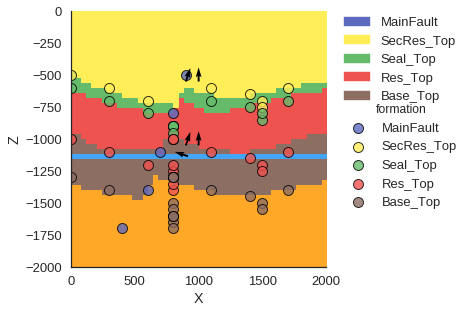

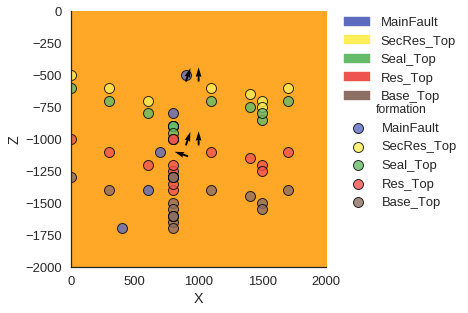

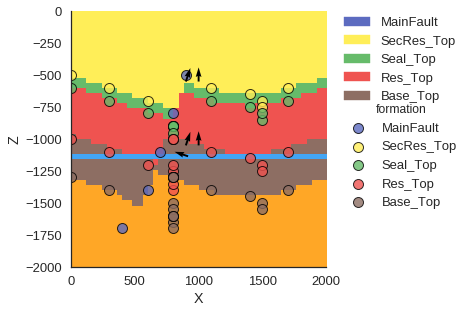

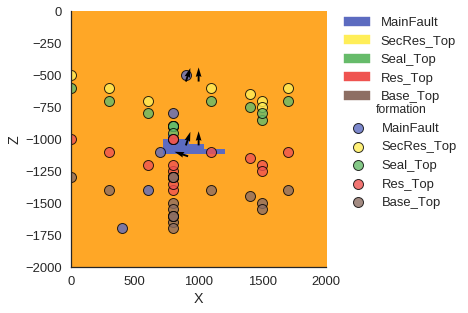

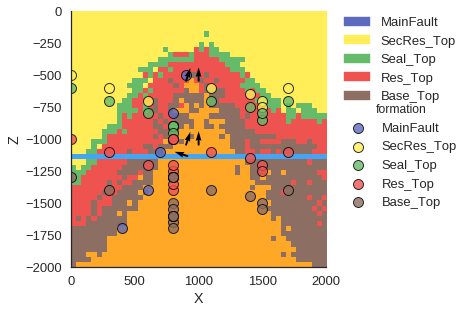

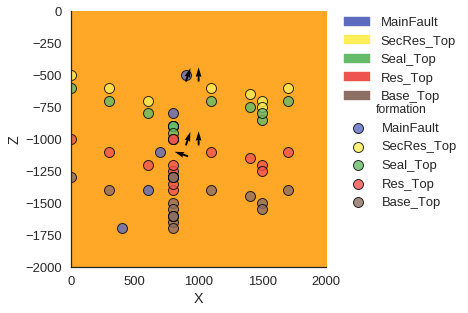

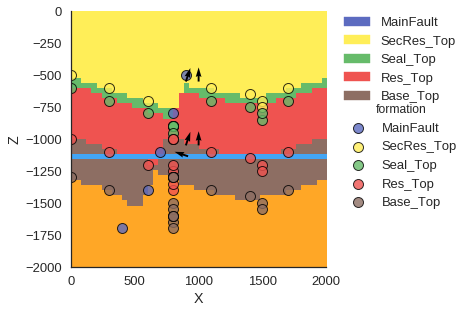

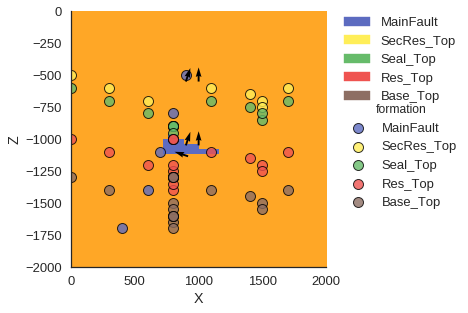

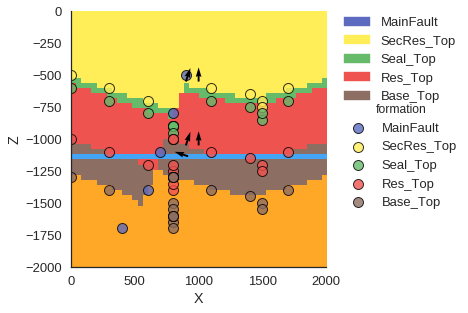

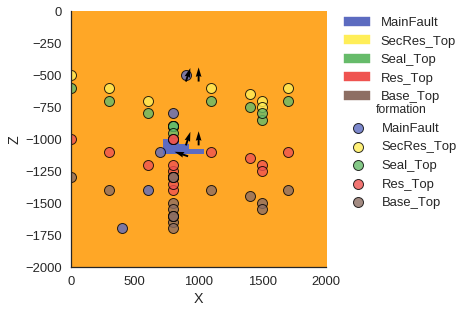

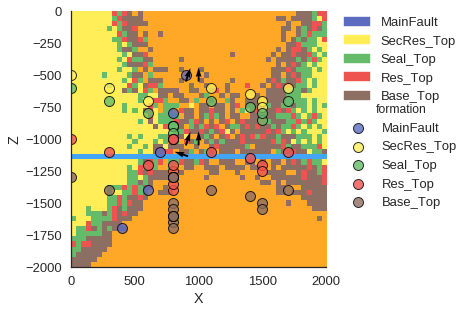

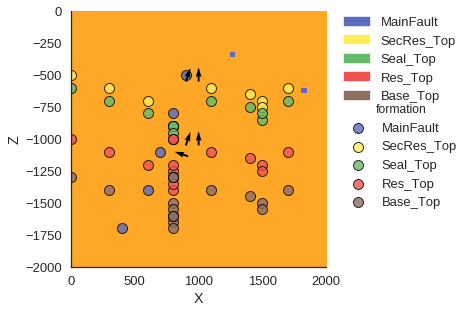

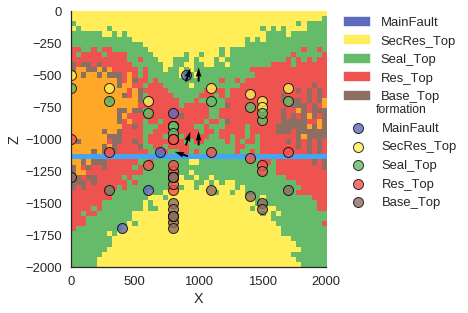

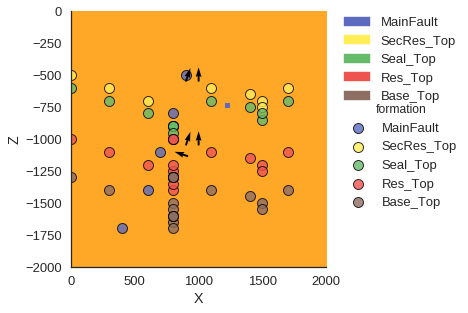

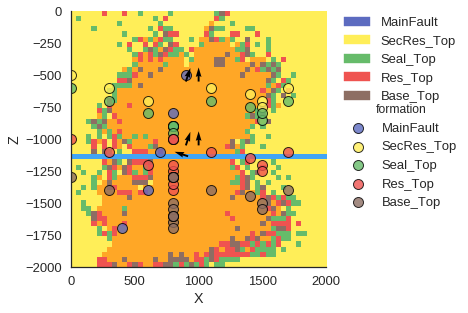

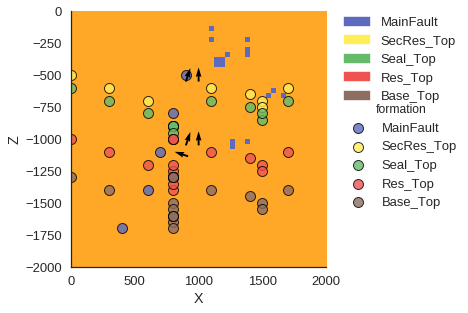

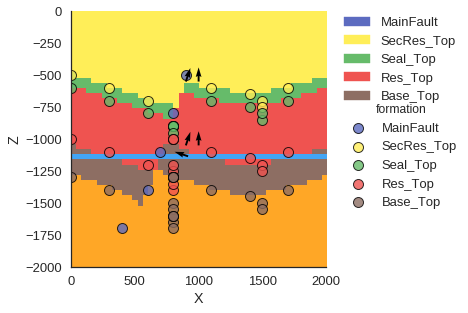

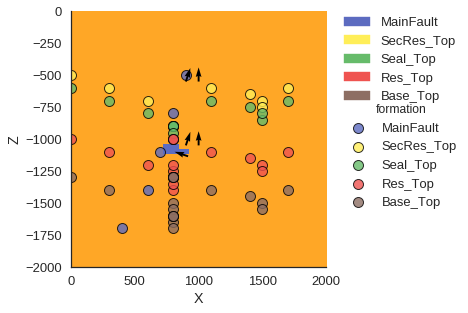

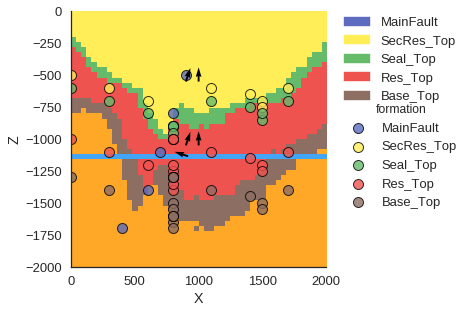

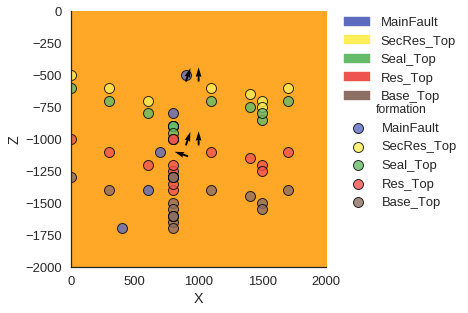

In [108]:
M = pymc.MCMC(model)
M.sample(iter=iterations)

In [78]:
res_top_unc_trace = M.trace('z_unc_res_top')[:]
fault_sealing_trace = M.trace('fault_sealing_unc')[:]
structural_model_trace = M.trace('structural_model')[:] #[0]=lith_sol,[1]=fault:sol,[2]=max_volume

fw_res_th_trace = M.trace('res_th')[:]
fw_seal_th_trace = M.trace('seal_th')[:]
fw_sec_res_th_trace = M.trace('sec_res_th')[:]

#for j in range(iterations):
#    plt.figure()
#    #plt.title('Change in res_top: %s' % bla[j])
#    #print(bla[j])
#    if fault_sealing == True:
#        print("Fault is sealed.")
#    else:
#        print("Fault is permeable.")
#    print("Max. trap volume = ", trap_volume_trace[j][2])
#    gp.plot_section(geo_data, trap_volume_trace[j][0][0,0], 25, plot_data =1)

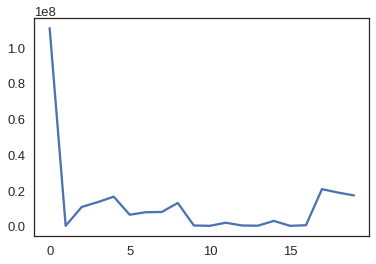

In [79]:
max_volume_trace = structural_model_trace[:,2]
plt.plot(max_volume_trace)

ZeroDivisionError: integer division or modulo by zero

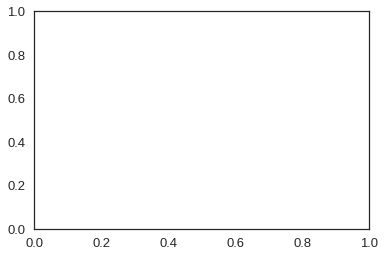

In [80]:
plt.plot(fw_res_th_trace)
plt.plot(fw_seal_th_trace)
plt.plot(fw_sec_res_th_trace)

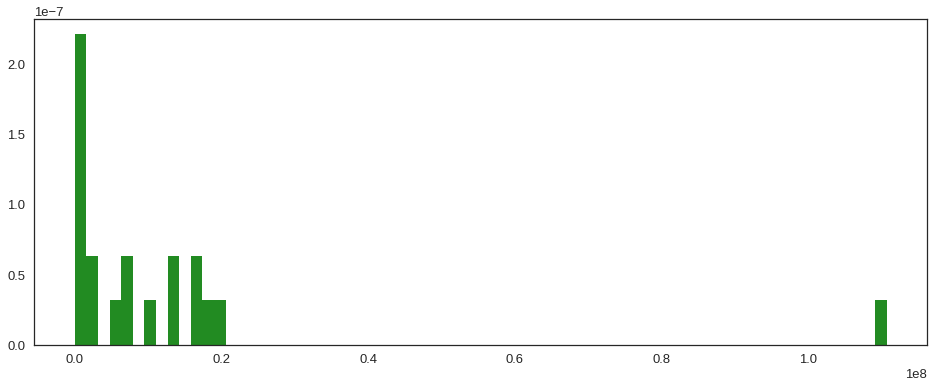

In [81]:
figsize(16, 6)

#_hist1 = plt.hist(max_volume_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")
volumes = max_volume_trace
mask = volumes == 0
masked_trace = volumes[~mask]
_hist1 = plt.hist(max_volume_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "forestgreen")
#_hist1 = plt.hist(masked_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")

In [44]:
#LOSS FUNCTIONS
estimates_s = np.arange(0,60000000, 10000)

#weight factors
ov = 1.25
ov_b = 2
uv_b = 1.5

#risk parameters
risks_s = np.arange(0.5, 1.6, 0.25)

#risk neutral
def volume_loss4(estimate_s, true_s):
        loss_s = np.zeros_like(true_s)
        underest = (estimate_s < true_s) 
        underest_bad = (estimate_s <= 0) & (true_s > 0)
        overest = (estimate_s > true_s) 
        overest_bad = (estimate_s > 0) & (true_s <= 0)
        loss_s[underest] = (true_s[underest] - estimate_s)
        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*uv_b
        loss_s[overest] = (estimate_s - true_s[overest])*ov
        loss_s[overest_bad] = (estimate_s - true_s[overest_bad])*ov_b
        return loss_s

#including risk
def volume_lossR(estimate_s, true_s, risk_s):
        loss_s = np.zeros_like(true_s)
        underest = (estimate_s < true_s) 
        underest_bad = (estimate_s == 0) & (true_s > 0)
        overest = (estimate_s > true_s) 
        overest_bad = (estimate_s > 0) & (true_s == 0)
        loss_s[underest] = (true_s[underest] - estimate_s)
        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*(uv_b*(risk_s**-0.5))
        loss_s[overest] = (estimate_s - true_s[overest])*(ov*risk_s)
        loss_s[overest_bad] = np.abs((true_s[overest_bad]-estimate_s))*(ov_b*risk_s)
        return loss_s
    
#def volume_lossR(estimate_s, true_s, risk_s):
#        loss_s = np.zeros_like(true_s)
#        underest = (estimate_s < true_s) 
#        underest_bad = (estimate_s <= 0) & (true_s > 0)
#        overest = (estimate_s > true_s) 
#        overest_bad = (estimate_s > 0) & (true_s <= 0)
#        loss_s[underest] = (true_s[underest] - estimate_s)
#        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*(uv_b*(risk_s**-0.5))
#        loss_s[overest] = (estimate_s - true_s[overest])*(ov*risk_s)
#        loss_s[overest_bad] = (estimate_s - true_s[overest_bad])*(ov_b*risk_s)
#        return loss_s

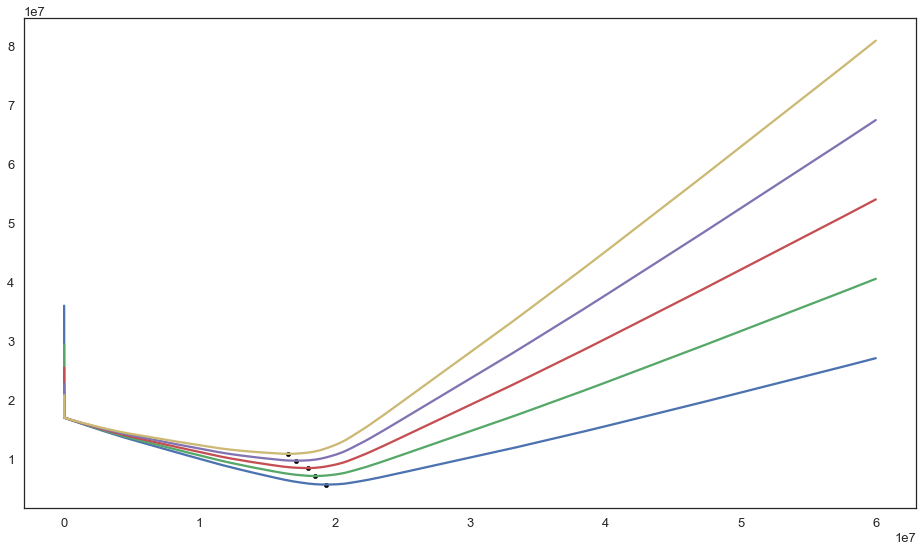

In [45]:
figsize(16, 9)

# No reduced uncertainty, different risks
BA_before = np.zeros_like(risks_s)
EL_before = np.zeros_like(risks_s)
expected_loss = lambda estimate_s, risk_s: volume_lossR(estimate_s, masked_trace, risk_s).mean()

counter = 0
for r in risks_s:
    loss = [expected_loss(e, r) for e in estimates_s]
    _min_score = sop.fmin(expected_loss, -40, args=(r,),disp = False)
    #print(_min_score)
    if _min_score < 0:
        _min_score = 0
    plt.plot(estimates_s, loss, label = "Risk r "+str(r))
    plt.scatter(_min_score, expected_loss(_min_score,r), s = 20, color = 'black')
    #lt.vlines(_min_results, 0, 0.02, color = 'black', linestyles="--")
    #print("Bayes action (minimum) at risk r %.2f: %.2f" % (r, _min_score))
    BA_before[counter] = _min_score
    EL_before[counter] = expected_loss(_min_score,r)
    counter += 1


In [83]:
# ADDING THICKNESS LIKELIHOOD FUNCTIONS
#Additional information, updating with likelihoods

#return fw_res_th, fw_seal_th, fw_sec_res_th, fw_rb_z, fw_sb_z, fw_r2b_z, fw_ob_z

std1 = 10
std2 = 20
std3 = 50

@pymc.stochastic
def res_th_likelihood(value = 0, res_th=res_th):
    return pymc.normal_like(res_th, 250., 1./np.square(std3))

@pymc.stochastic
def seal_th_likelihood(value = 0, seal_th=seal_th):
    return pymc.normal_like(seal_th, 400., 1./np.square(std2))

@pymc.stochastic
def sec_res_th_likelihood(value = 0, sec_res_th=sec_res_th):
    return pymc.normal_like(sec_res_th, 120., 1./np.square(std1))

Z-Variations top to bottom: 0.0017195954508803925 -0.0052841006015633225 0.0036568661692541788 0.0019580150791788016
Z-Variations top to bottom: 0.0017195954508803925 -0.0052841006015633225 0.005314529176505404 0.0019580150791788016
Z-Variations top to bottom: -0.0008077778094960054 -0.0052841006015633225 0.005314529176505404 0.0019580150791788016
Z-Variations top to bottom: -0.0008077778094960054 -0.015781740820802297 0.005314529176505404 0.0019580150791788016


/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Serie

Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 18
TRAP FOUND, section: 18
Checking Section: 20
Maximum reservoir volume: 13312000.0 m³
 [---              10%                  ] 2 of 20 complete in 9.4 secZ-Variations top to bottom: -0.0008077778094960054 -0.0052841006015633225 0.005314529176505404 0.0020207089765225963
Z-Variations top to bottom: -0.0008077778094960054 -0.0052841006015633225 0.008891133024260447 0.0020207089765225963
Z-Variations top to bottom: -0.0018500925635746169 -0.0052841006015633225 0.008891133024260447 0.0020207089765225963
Z-Variations top to bottom: -0.0018500925635746169 -0.0015159485762632386 0.008891133024260447 0.0020207089765225963


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.9842063676021056e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 20
Checking Section: 16
TRAP FOUND, section: 16
Checking Section: 19
Maximum reservoir volume: 16768000.0 m³
 [-----            15%                  ] 3 of 20 complete in 19.1 secZ-Variations top to bottom: -0.0018500925635746169 -0.0015159485762632386 0.008891133024260447 0.0003081499175062255
Z-Variations top to bottom: -0.0018500925635746169 -0.0015159485762632386 0.011644682969583275 0.0003081499175062255
Z-Variations top to bottom: 0.00033753975005180797 -0.0015159485762632386 0.008891133024260447 0.0003081499175062255
Z-Variations top to bottom: 0.00033753975005180797 0.0049828654452929895 0.008891133024260447 0.0003081499175062255


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.79302012407506e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 21
Checking Section: 17
TRAP FOUND, section: 17
Maximum reservoir volume: 18432000.0 m³
 [-------          20%                  ] 4 of 20 complete in 30.8 secZ-Variations top to bottom: 0.00033753975005180797 0.0049828654452929895 0.008891133024260447 0.0016009991483535888
Z-Variations top to bottom: 0.00033753975005180797 0.0049828654452929895 0.007896982958840126 0.0016009991483535888
Z-Variations top to bottom: 0.002847302137707398 0.0049828654452929895 0.007896982958840126 0.0016009991483535888
Z-Variations top to bottom: 0.002847302137707398 -0.004797434479373872 0.007896982958840126 0.0016009991483535888

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.230489264889025e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)



Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 317
TRAP FOUND, section: 317
Checking Section: 277
TRAP FOUND, section: 277
Checking Section: 357
TRAP FOUND, section: 357
Checking Section: 296
TRAP FOUND, section: 296
Checking Section: 250
Checking Section: 403
Checking Section: 280
TRAP FOUND, section: 280
Checking Section: 297
TRAP FOUND, section: 297
Checking Section: 378
TRAP FOUND, section: 378
Checking Section: 349
TRAP FOUND, section: 349
Checking Section: 281
TRAP FOUND, section: 281
Checking Section: 367
TRAP FOUND, section: 367
Checking Section: 262
TRAP FOUND, section: 262
Checking Section: 343
TRAP FOUND, section: 343
Checking Section: 318
TRAP FOUND, section: 318
Maximum reservoir volume: 1024000.0 m³
 [---------        25%                  ] 5 of 20 complete in 43.7 secZ-Variations top to bottom: 0.002847302137707398 -0.00479

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.345815807910158e-12
  ' condition number: {}'.format(rcond), RuntimeWarning)



Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 17
TRAP FOUND, section: 17
Checking Section: 20
Maximum reservoir volume: 15360000.0 m³
 [-----------      30%                  ] 6 of 20 complete in 54.4 secZ-Variations top to bottom: 0.001857630231693512 -0.003266750177760809 0.007896982958840126 0.002018382052148482
Z-Variations top to bottom: 0.001857630231693512 -0.003266750177760809 0.011067271450359038 0.002018382052148482
Z-Variations top to bottom: -0.0011491574184545688 -0.003266750177760809 0.007896982958840126 0.002018382052148482
Z-Variations top to bottom: -0.0011491574184545688 -0.006772034848752643 0.007896982958840126 0.002018382052148482


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.328373812474215e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 638
TRAP FOUND, section: 638
Checking Section: 378
Checking Section: 625
TRAP FOUND, section: 625
Checking Section: 393
Checking Section: 666
TRAP FOUND, section: 666
Checking Section: 412
TRAP FOUND, section: 412
Checking Section: 356
Checking Section: 377
Checking Section: 394
TRAP FOUND, section: 394
Checking Section: 360
TRAP FOUND, section: 360
Checking Section: 436
TRAP FOUND, section: 436
Checking Section: 506
TRAP FOUND, section: 506
Checking Section: 458
Checking Section: 426
TRAP FOUND, section: 426
Checking Section: 516
Checking Section: 359
TRAP FOUND, section: 359
Checking Section: 517
TRAP FOUND, section: 517
Maximum reservoir volume: 832000.0 m³
 [-------------    35%                  ] 7 of 20 complete in 67.3 secZ-Variations top to bottom: -0.0011491574184545688 -0.00677203484

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.984356594655125e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 16
TRAP FOUND, section: 16
Checking Section: 19
Maximum reservoir volume: 13568000.0 m³
 [---------------  40%                  ] 8 of 20 complete in 77.5 secZ-Variations top to bottom: -7.72008596997371e-05 -0.002705774980200219 0.005896405027769249 0.0036364908512631104
Z-Variations top to bottom: -7.72008596997371e-05 -0.002705774980200219 0.011825576905565249 0.0036364908512631104
Z-Variations top to bottom: -0.001105529990433753 -0.002705774980200219 0.011825576905565249 0.0036364908512631104
Z-Variations top to bottom: -0.001105529990433753 -0.007210532264903444 0.011825576905565249 0.0036364908512631104


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.1442194367445305e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 26
Checking Section: 24
TRAP FOUND, section: 24
Maximum reservoir volume: 10624000.0 m³
 [-----------------45%                  ] 9 of 20 complete in 87.7 secZ-Variations top to bottom: -0.001105529990433753 -0.002705774980200219 0.011825576905565249 0.0032224257532371733
Z-Variations top to bottom: -0.001105529990433753 -0.002705774980200219 0.016926182884375272 0.0032224257532371733
Z-Variations top to bottom: -0.00027164418253772737 -0.002705774980200219 0.011825576905565249 0.0032224257532371733
Z-Variations top to bottom: -0.00027164418253772737 -0.007683982799613672 0.011825576905565249 0.0032224257532371733


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9924723329567406e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 21
Checking Section: 17
TRAP FOUND, section: 17
Checking Section: 20
TRAP FOUND, section: 20
Maximum reservoir volume: 20224000.0 m³
 [-----------------50%                  ] 10 of 20 complete in 98.0 secZ-Variations top to bottom: -0.00027164418253772737 -0.002705774980200219 0.011825576905565249 0.003948192909416065
Z-Variations top to bottom: -0.00027164418253772737 -0.002705774980200219 0.01372631704768138 0.003948192909416065
Z-Variations top to bottom: -0.0010060315147886406 -0.002705774980200219 0.01372631704768138 0.003948192909416065
Z-Variations top to bottom: -0.0010060315147886406 -0.0027021324821534225 0.01372631704768138 0.003948192909416065


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.927947573113274e-16
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 114
TRAP FOUND, section: 114
Checking Section: 398
Checking Section: 351
TRAP FOUND, section: 351
Checking Section: 232
TRAP FOUND, section: 232
Checking Section: 397
Checking Section: 220
TRAP FOUND, section: 220
Checking Section: 237
Checking Section: 110
TRAP FOUND, section: 110
Checking Section: 204
Checking Section: 280
TRAP FOUND, section: 280
Checking Section: 157
TRAP FOUND, section: 157
Checking Section: 132
Checking Section: 387
TRAP FOUND, section: 387
Checking Section: 359
Checking Section: 305
TRAP FOUND, section: 305
Checking Section: 343
TRAP FOUND, section: 343
Checking Section: 361
Checking Section: 358
Checking Section: 181
TRAP FOUND, section: 181
Checking Section: 363
TRAP FOUND, section: 363
Checking Section: 297
Checking Section: 396
Checking Section: 194
Checking Section

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9923266161847586e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.


/home/bl9/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Checking Section: 18
No trap found! =(
Maximum reservoir volume: 0.0 m³
 [-----------------60%--                ] 12 of 20 complete in 119.7 secZ-Variations top to bottom: -0.0011668588028242402 -0.0026827022157672586 0.016222489276293686 0.0033804694741320484
Z-Variations top to bottom: -0.0011668588028242402 -0.0026827022157672586 0.013390322015565278 0.0033804694741320484
Z-Variations top to bottom: -0.003611206356098553 -0.0026827022157672586 0.013390322015565278 0.0033804694741320484
Z-Variations top to bottom: -0.003611206356098553 0.0021840263063575265

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.9879054092019075e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


 0.013390322015565278 0.0033804694741320484
Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 17
TRAP FOUND, section: 17
Checking Section: 20
Maximum reservoir volume: 22528000.0 m³
 [-----------------65%----              ] 13 of 20 complete in 129.7 secZ-Variations top to bottom: -0.003611206356098553 0.0021840263063575265 0.013390322015565278 0.004259869754223067
Z-Variations top to bottom: -0.003611206356098553 0.0021840263063575265 0.014676079049677056 0.004259869754223067
Z-Variations top to bottom: -0.0028863616455816134 0.0021840263063575265 0.014676079049677056 0.004259869754223067
Z-Variations top to bottom: -0.0028863616455816134 0.005899997811544472 0.014676079049677056 0.004259869754223067


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9921274699297165e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 17
TRAP FOUND, section: 17
Checking Section: 20
Maximum reservoir volume: 24256000.0 m³
 [-----------------70%------            ] 14 of 20 complete in 140.1 secZ-Variations top to bottom: -0.0028863616455816134 0.0021840263063575265 0.014676079049677056 0.004711226535323651
Z-Variations top to bottom: -0.0028863616455816134 0.0021840263063575265 0.020597364700449913 0.004711226535323651
Z-Variations top to bottom: -0.006521117643062001 0.0021840263063575265 0.014676079049677056 0.004711226535323651
Z-Variations top to bottom: -0.0028863616455816134 0.0021840263063575265 0.014676079049677056

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9892575434110604e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


 0.004711226535323651
Z-Variations top to bottom: -0.0028863616455816134 0.015494923435174937 0.014676079049677056 0.004711226535323651
Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 17
TRAP FOUND, section: 17
Checking Section: 24
Maximum reservoir volume: 24256000.0 m³
 [-----------------75%--------          ] 15 of 20 complete in 150.6 secZ-Variations top to bottom: -0.0028863616455816134 0.0021840263063575265 0.014676079049677056 0.004667652277337653
Z-Variations top to bottom: -0.0028863616455816134 0.0021840263063575265 0.013672775480470111 0.004667652277337653
Z-Variations top to bottom: -0.0032992638618674166 0.0021840263063575265 0.013672775480470111 0.004667652277337653
Z-Variations top to bottom: -0.0032992638618674166 0.010060249057130531 0.013672775480470111 0.004667652277337653


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.982354723763848e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 17
TRAP FOUND, section: 17
Checking Section: 20
Maximum reservoir volume: 22784000.0 m³
 [-----------------80%----------        ] 16 of 20 complete in 160.9 secZ-Variations top to bottom: -0.0032992638618674166 0.0021840263063575265 0.013672775480470111 0.004819863899110526
Z-Variations top to bottom: -0.0032992638618674166 0.0021840263063575265 0.0113251843387742 0.004819863899110526
Z-Variations top to bottom: -0.003095042950910704 0.0021840263063575265 0.0113251843387742 0.004819863899110526
Z-Variations top to bottom: -0.003095042950910704

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9920717853061376e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


 -0.0010771963024254114 0.0113251843387742 0.004819863899110526
Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 16
TRAP FOUND, section: 16
Checking Section: 19
Maximum reservoir volume: 19456000.0 m³
 [-----------------85%------------      ] 17 of 20 complete in 171.1 secZ-Variations top to bottom: -0.003095042950910704 -0.0010771963024254114 0.0113251843387742 0.003229692854117956
Z-Variations top to bottom: -0.003095042950910704 -0.0010771963024254114 0.012483366175445237 0.003229692854117956
Z-Variations top to bottom: -0.0044594489587013566 -0.0010771963024254114 0.012483366175445237 0.003229692854117956
Z-Variations top to bottom: -0.003095042950910704 -0.00024581314237105353 0.012483366175445237 0.003229692854117956


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.2095696336743594e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 575
TRAP FOUND, section: 575
Checking Section: 550
TRAP FOUND, section: 550
Checking Section: 547
TRAP FOUND, section: 547
Checking Section: 538
TRAP FOUND, section: 538
Checking Section: 560
TRAP FOUND, section: 560
Checking Section: 261
TRAP FOUND, section: 261
Checking Section: 543
TRAP FOUND, section: 543
Checking Section: 544
TRAP FOUND, section: 544
Checking Section: 580
TRAP FOUND, section: 580
Checking Section: 478
TRAP FOUND, section: 478
Checking Section: 569
TRAP FOUND, section: 569
Checking Section: 343
TRAP FOUND, section: 343
Checking Section: 555
TRAP FOUND, section: 555
Checking Section: 542
TRAP FOUND, section: 542
Checking Section: 301
TRAP FOUND, section: 301
Checking Section: 568
TRAP FOUND, section: 568
Checking Section: 499
Checking Section: 557
TRAP FOUND, section: 557
C

/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.991934915623883e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


 0.009935206211320692 0.004676807310616751
Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 17
TRAP FOUND, section: 17
Checking Section: 20
Maximum reservoir volume: 17792000.0 m³
 [-----------------95%----------------  ] 19 of 20 complete in 194.0 secZ-Variations top to bottom: -0.0029107592303569975 -0.00024581314237105353 0.009935206211320692 0.0037253458465142117
Z-Variations top to bottom: -0.0029107592303569975 -0.00024581314237105353 0.00960120583593753 0.0037253458465142117
Z-Variations top to bottom: -0.0024868147450843687 -0.00024581314237105353 0.00960120583593753 0.0037253458465142117
Z-Variations top to bottom: -0.0024868147450843687 -0.002364463524288718 0.00960120583593753 0.0037253458465142117


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.984227184283817e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is pathway. Down to spill.
Checking Section: 16
TRAP FOUND, section: 16
Checking Section: 19
Maximum reservoir volume: 17536000.0 m³
 [-----------------100%-----------------] 20 of 20 complete in 205.2 secZ-Variations top to bottom: -0.0024868147450843687 -0.002364463524288718 0.00960120583593753 0.004603431262219842
Z-Variations top to bottom: -0.0024868147450843687 -0.002364463524288718 0.009511538663344208 0.004603431262219842
Z-Variations top to bottom: -0.00373477164018814 -0.002364463524288718 0.009511538663344208 0.004603431262219842
Z-Variations top to bottom: -0.0024868147450843687 -0.002176054761886245 0.009511538663344208 0.004603431262219842


/home/bl9/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.9923800456678187e-11
  ' condition number: {}'.format(rcond), RuntimeWarning)


Spill Point: [ 1387.75512695   857.1428833  -1158.96513885]
Leak Point: [  489.79592896   326.53060913 -1432.78823451]
Spill point defines trap.
Fault is sealing. Down to spill.
Checking Section: 16
TRAP FOUND, section: 16
Checking Section: 19
Maximum reservoir volume: 17280000.0 m³
 [-----------------105%------------------] 21 of 20 complete in 216.2 sec

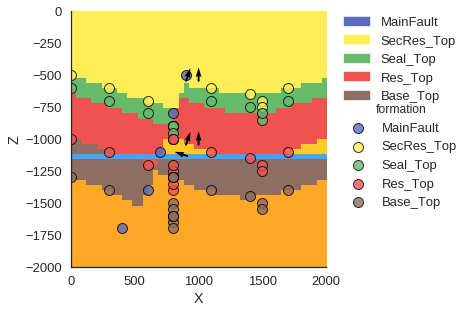

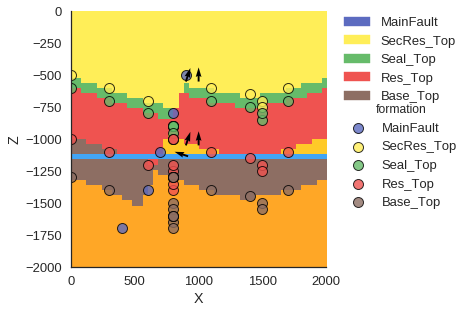

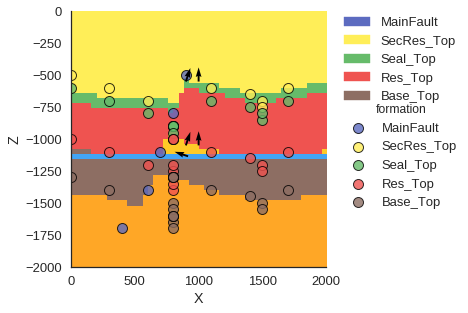

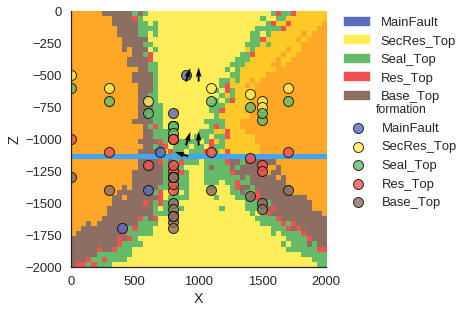

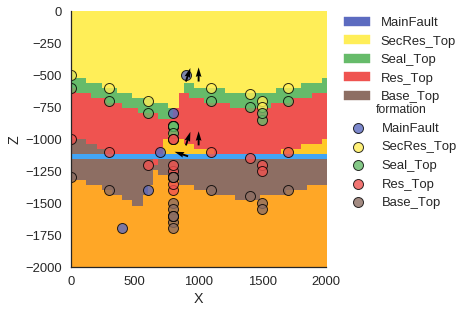

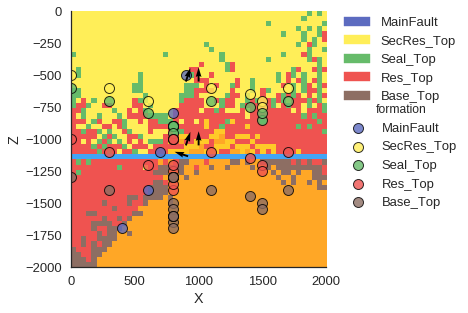

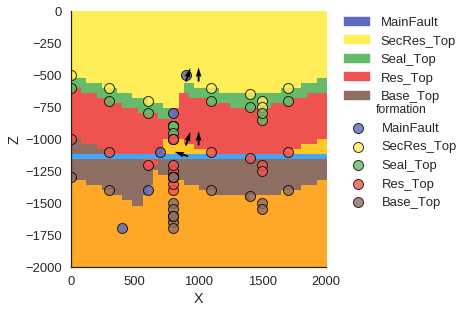

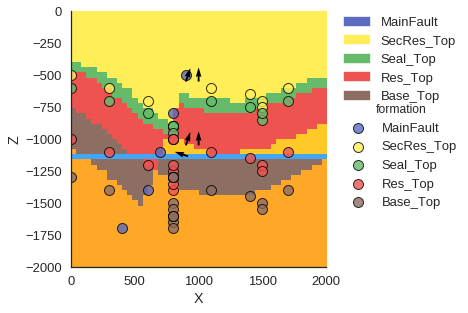

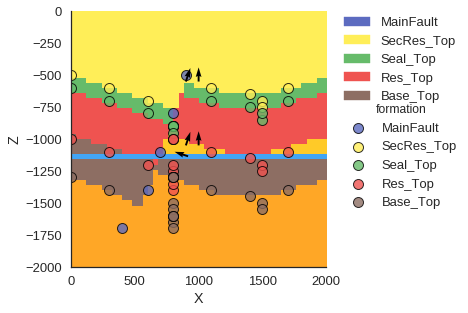

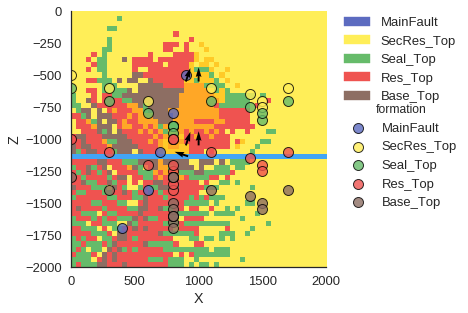

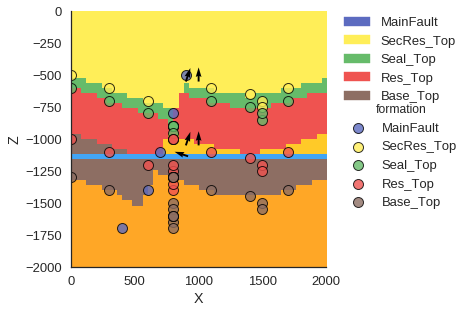

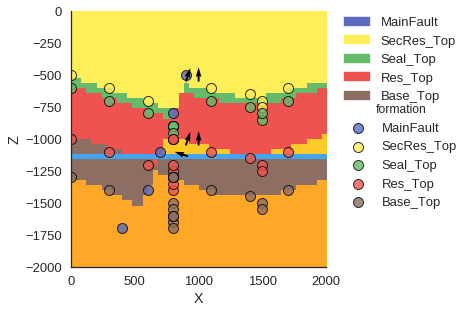

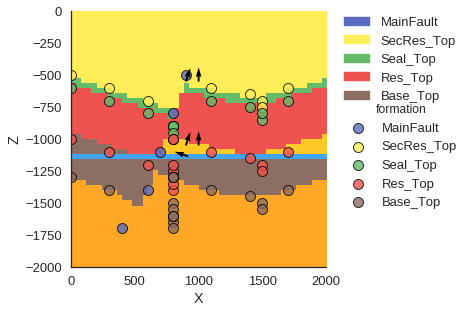

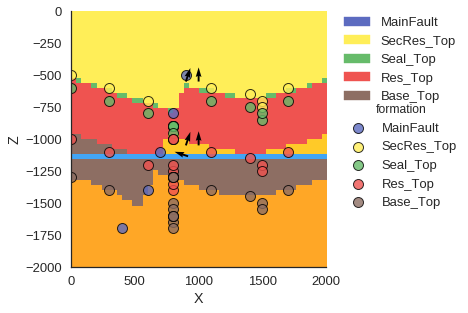

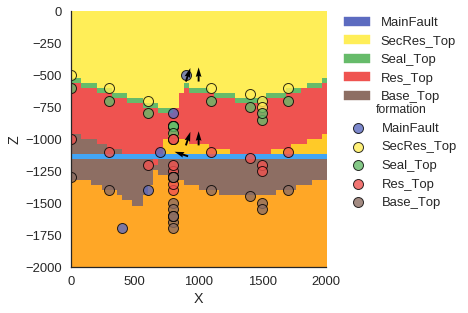

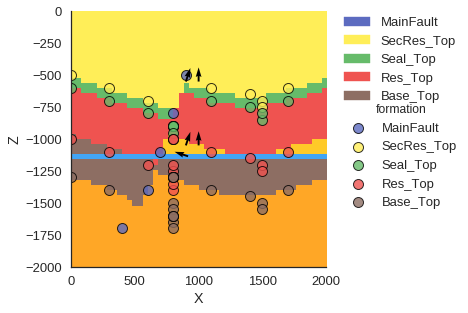

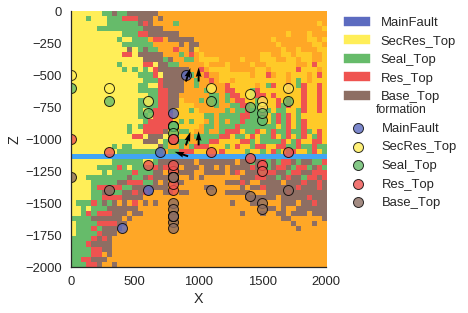

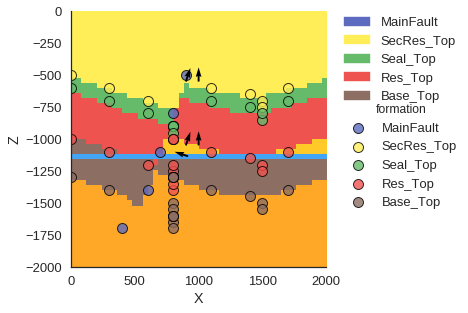

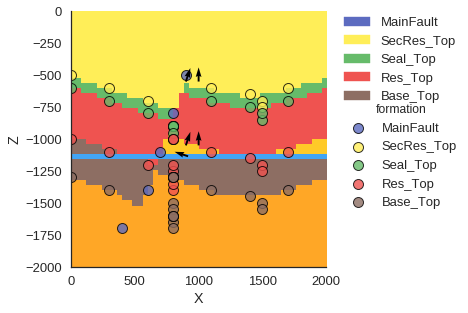

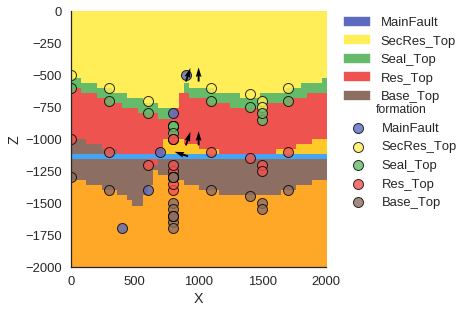

In [84]:
#model = pymc.Model([pos_unc_model, z_unc_res_top, fault_sealing, fw_th, hw_th, 
#                    res_th_likelihood, seal_th_likelihood, sec_res_th_likelihood])
model = pymc.Model([interp_unc, z_unc_res_top, fault_sealing, structural_model, 
                    res_th, seal_th, sec_res_th, 
                    res_th_likelihood, seal_th_likelihood, sec_res_th_likelihood])


M = pymc.MCMC(model)
M.sample(iter=iterations)

In [85]:
res_top_unc_trace = M.trace('z_unc_res_top')[:]
fault_sealing_trace = M.trace('fault_sealing_unc')[:]
structural_model_trace = M.trace('structural_model')[:] #[0]=lith_sol,[1]=fault:sol,[2]=max_volume

fw_res_th_trace = M.trace('res_th')[:]
fw_seal_th_trace = M.trace('seal_th')[:]
fw_sec_res_th_trace = M.trace('sec_res_th')[:]

interp_trace = M.trace('interp_unc')[:]

#for j in range(iterations):
#    plt.figure()
#    #plt.title('Change in res_top: %s' % bla[j])
#    #print(bla[j])
#    if fault_sealing == True:
#        print("Fault is sealed.")
#    else:
#        print("Fault is permeable.")
#    print("Max. trap volume = ", trap_volume_trace[j][2])
#    gp.plot_section(geo_data, trap_volume_trace[j][0][0,0], 25, plot_data =1)

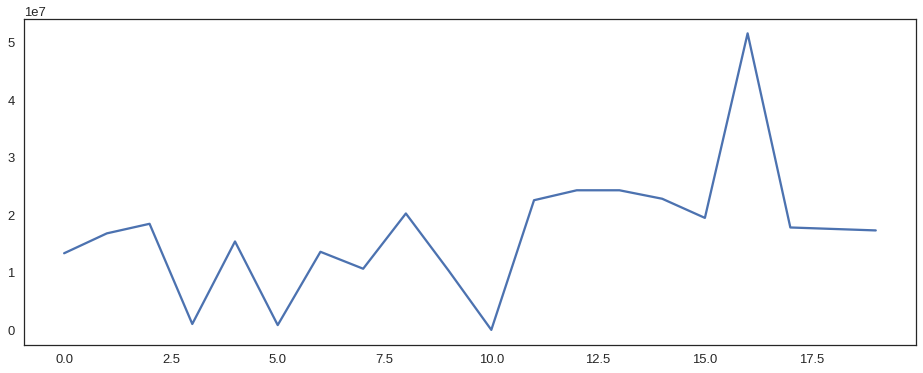

In [86]:
max_volume_trace = structural_model_trace[:,2]
plt.plot(max_volume_trace)

ZeroDivisionError: integer division or modulo by zero

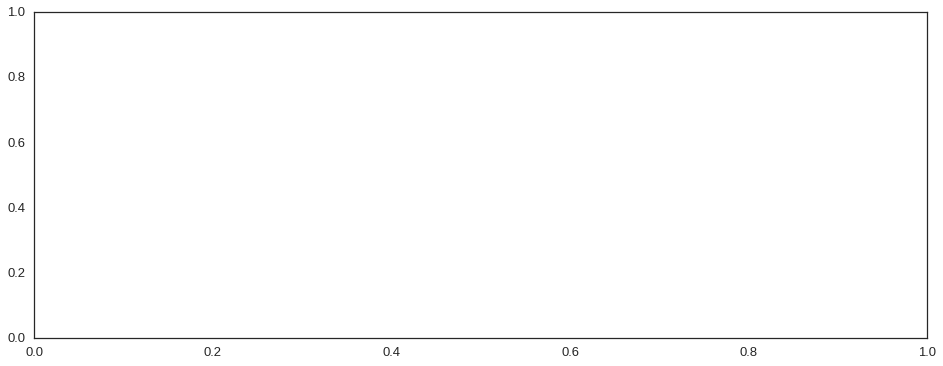

In [87]:
plt.plot(fw_res_th_trace)
plt.plot(fw_seal_th_trace)
plt.plot(fw_sec_res_th_trace)

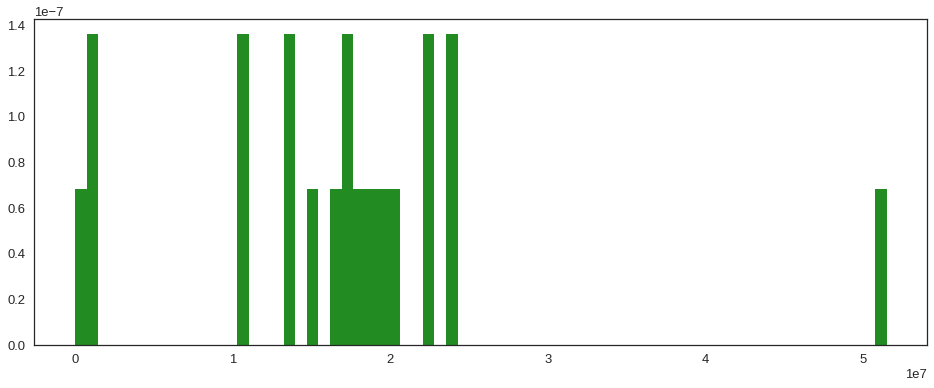

In [88]:
figsize(16, 6)

#_hist1 = plt.hist(max_volume_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")
volumes = max_volume_trace
mask = volumes == 0
masked_trace = volumes[~mask]
_hist1 = plt.hist(max_volume_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "forestgreen")
#_hist1 = plt.hist(masked_trace, bins=70, normed=True, histtype="stepfilled",label="prior distribution", color = "steelblue")

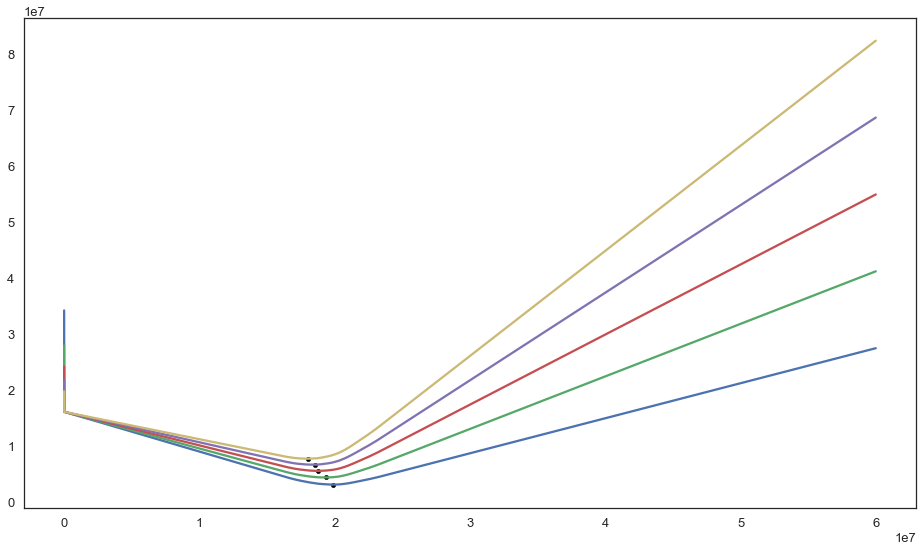

In [52]:
figsize(16, 9)

# No reduced uncertainty, different risks
BA_before = np.zeros_like(risks_s)
EL_before = np.zeros_like(risks_s)
expected_loss = lambda estimate_s, risk_s: volume_lossR(estimate_s, masked_trace, risk_s).mean()

counter = 0
for r in risks_s:
    loss = [expected_loss(e, r) for e in estimates_s]
    _min_score = sop.fmin(expected_loss, -40, args=(r,),disp = False)
    #print(_min_score)
    if _min_score < 0:
        _min_score = 0
    plt.plot(estimates_s, loss, label = "Risk r "+str(r))
    plt.scatter(_min_score, expected_loss(_min_score,r), s = 20, color = 'black')
    #lt.vlines(_min_results, 0, 0.02, color = 'black', linestyles="--")
    #print("Bayes action (minimum) at risk r %.2f: %.2f" % (r, _min_score))
    BA_before[counter] = _min_score
    EL_before[counter] = expected_loss(_min_score,r)
    counter += 1


In [12]:
# DETERMINATION OF LAYER THICKNESSES ON HANGING- AND FOOTWALL BASED ON VOXEL-COUNTING
#fault_block = fault_sol[0,0]
#lith_block = lith_sol[0,0]
#th_factor = scale_factor
#
## Finding fault tips, upper and lower
#def find_fault_tips(fault_block):
#    fault_reshape = fault_block.reshape(50,50,50)
#    upper_fault_tip = np.count_nonzero(fault_reshape[:,25,49])+1
#    lower_fault_tip = np.count_nonzero(fault_reshape[:,25,0])-1
#    return upper_fault_tip, lower_fault_tip
#    
## Footwall thicknesses
#def fw_thicknesses(lith_block, upper_fault_tip, th_factor):
#    lith_reshape = lith_block.reshape(50,50,50)
#    fw_reservoir_count = 0
#    fw_seal_count = 0 
#    fw_sec_res_count = 0 
#    for i in lith_reshape[upper_fault_tip,25,:]:
#        if i == (interp_data.get_formation_number()['Reservoir']):
#            fw_reservoir_count += 1
#            fw_reservoir_thickness = fw_reservoir_count * th_factor
#        elif i == (interp_data.get_formation_number()['Seal']):
#            fw_seal_count += 1
#            fw_seal_thickness = fw_seal_count * th_factor
#        elif i == (interp_data.get_formation_number()['SecondaryReservoir']):
#            fw_sec_res_count += 1
#            fw_sec_res_thickness = fw_sec_res_count * th_factor
#    return fw_reservoir_thickness, fw_seal_thickness, fw_sec_res_thickness
#
## Hanging wall thicknesses
#def hw_thicknesses(lith_block, lower_fault_tip, th_factor):
#    hw_reservoir_count = 0
#    hw_seal_count = 0 
#    hw_sec_res_count = 0 
#    for i in lith_reshape[lower_fault_tip,25,:]:
#        if i == (interp_data.get_formation_number()['Reservoir']):
#            hw_reservoir_count += 1
#            hw_reservoir_thickness = hw_reservoir_count * th_factor
#        elif i == (interp_data.get_formation_number()['Seal']):
#            hw_seal_count += 1
#            hw_seal_thickness = hw_seal_count * th_factor
#        elif i == (interp_data.get_formation_number()['SecondaryReservoir']):
#            hw_sec_res_count += 1
#            hw_sec_res_thickness = hw_sec_res_count * th_factor
#    return hw_reservoir_thickness, hw_seal_thickness, hw_sec_res_thickness

# DETERMINING THICKNESS BASED ON Z-POINT_POSITIONS IN INTERP_DATA

# Footwall at X = 1600 and Y = 1000
#def fw_thicknesses(interp_data):
#    res_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'
#    seal_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Seal'
#    sec_res_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'SecondaryReservoir'
#    over_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Overlying'
#    
#    rescale_f = interp_data.rescaling_factor
#    
#    fw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (1400/rescale_f))
#    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
#    points_fw = interp_data.geo_data_res.interfaces[fw_x_cond]
#    points_fw = points_fw[y_mid]
#    
#    fw_rb_z = points_fw[res_bot_cond]['Z'].values*rescale_f
#    fw_sb_z = points_fw[seal_bot_cond]['Z'].values*rescale_f
#    fw_r2b_z = points_fw[sec_res_bot_cond]['Z'].values*rescale_f
#    fw_ob_z = points_fw[over_bot_cond]['Z'].values*rescale_f
#    
#    fw_res_th = np.abs(fw_sb_z-fw_rb_z)
#    fw_seal_th = np.abs(fw_r2b_z-fw_sb_z)
#    fw_sec_res_th = np.abs(fw_ob_z-fw_r2b_z)
#    return fw_res_th, fw_seal_th, fw_sec_res_th, fw_rb_z, fw_sb_z, fw_r2b_z, fw_ob_z
#
## Hanging wall at X = 600 and Y = 1000
#def hw_thicknesses(interp_data):
#    res_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'
#    seal_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Seal'
#    sec_res_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'SecondaryReservoir'
#    over_bot_cond = interp_data.geo_data_res.interfaces['formation'] == 'Overlying'
#    
#    rescale_f = interp_data.rescaling_factor
#    
#    hw_x_cond = interp_data.geo_data_res.interfaces['X'] == (interp_data.extent_rescaled['X'].values[1] - (400/rescale_f))
#    y_mid = interp_data.geo_data_res.interfaces['Y'] == (interp_data.extent_rescaled['Y'].values[1] - (1000/rescale_f))
#    points_hw = interp_data.geo_data_res.interfaces[hw_x_cond]
#    points_hw = points_hw[y_mid]
#    
#    hw_rb_z = points_hw[res_bot_cond]['Z']
#    hw_sb_z = points_hw[seal_bot_cond]['Z']
#    hw_r2b_z = points_hw[sec_res_bot_cond]['Z']
#    hw_ob_z = points_hw[over_bot_cond]['Z']
#    
#    hw_res_th = np.abs(hw_sb_z.values-hw_rb_z.values)*rescale_f
#    hw_seal_th = np.abs(hw_r2b_z.values-hw_sb_z.values)*rescale_f
#    hw_sec_res_th = np.abs(hw_ob_z.values-hw_r2b_z.values)*rescale_f
#    return hw_res_th, hw_seal_th, hw_sec_res_th

# DETERMINING THICKNESS BASED ON Z-POINT_POSITIONS USING GEO_DATA
#res_bot_cond = geo_data.interfaces['formation'] == 'Reservoir'
#seal_bot_cond = geo_data.interfaces['formation'] == 'Seal'
#sec_res_bot_cond = geo_data.interfaces['formation'] == 'SecondaryReservoir'
#over_bot_cond = geo_data.interfaces['formation'] == 'Overlying'
#
#fw_x_cond = geo_data.interfaces['X'] == 1600
#y_mid = geo_data.interfaces['Y'] == 1000
#points_fw = geo_data.interfaces[fw_x_cond]
#points_fw = points_fw[y_mid]
## finding Z-values for each layer bottom
#fw_rb_z = points_fw[res_bot_cond]['Z']
#fw_sb_z = points_fw[seal_bot_cond]['Z']
#fw_r2b_z = points_fw[sec_res_bot_cond]['Z']
#fw_ob_z = points_fw[over_bot_cond]['Z']
#
#fw_res_th = np.abs(fw_sb_z.values-fw_rb_z.values)
#fw_seal_th = np.abs(fw_r2b_z.values-fw_sb_z.values)
#fw_sec_res_th = np.abs(fw_ob_z.values-fw_r2b_z.values)
#
#hw_x_cond = geo_data.interfaces['X'] == 600
#y_mid = geo_data.interfaces['Y'] == 1000
#points_hw = geo_data.interfaces[hw_x_cond]
#points_hw = points_hw[y_mid]
## finding Z-values for each layer bottom
#hw_rb_z = points_hw[res_bot_cond]['Z']
#hw_sb_z = points_hw[seal_bot_cond]['Z']
#hw_r2b_z = points_hw[sec_res_bot_cond]['Z']
#hw_ob_z = points_hw[over_bot_cond]['Z']
#
#hw_res_th = np.abs(hw_sb_z.values-hw_rb_z.values)
#hw_seal_th = np.abs(hw_r2b_z.values-hw_sb_z.values)
#hw_sec_res_th = np.abs(hw_ob_z.values-hw_r2b_z.values)
#
## Footwall
#def fw_thicknesses():
#    fw_x_cond = geo_data.interfaces['X'] == 1600
#    y_mid = geo_data.interfaces['Y'] == 1000
#    points_fw = geo_data.interfaces[fw_x_cond]
#    points_fw = points_fw[y_mid]
#    # finding Z-values for each layer bottom
#    fw_rb_z = points_fw[res_bot_cond]['Z']
#    fw_sb_z = points_fw[seal_bot_cond]['Z']
#    fw_r2b_z = points_fw[sec_res_bot_cond]['Z']
#    fw_ob_z = points_fw[over_bot_cond]['Z']
#    
#    fw_res_th = np.abs(fw_sb_z.values-fw_rb_z.values)
#    fw_seal_th = np.abs(fw_r2b_z.values-fw_sb_z.values)
#    fw_sec_res_th = np.abs(fw_ob_z.values-fw_r2b_z.values)
#
## Hanging wall
#def hw_thicknesses():
#    hw_x_cond = geo_data.interfaces['X'] == 600
#    y_mid = geo_data.interfaces['Y'] == 1000
#    points_hw = geo_data.interfaces[hw_x_cond]
#    points_hw = points_hw[y_mid]
#    # finding Z-values for each layer bottom
#    hw_rb_z = points_hw[res_bot_cond]['Z']
#    hw_sb_z = points_hw[seal_bot_cond]['Z']
#    hw_r2b_z = points_hw[sec_res_bot_cond]['Z']
#    hw_ob_z = points_hw[over_bot_cond]['Z']
#    
#    hw_res_th = np.abs(hw_sb_z.values-hw_rb_z.values)
#    hw_seal_th = np.abs(hw_r2b_z.values-hw_sb_z.values)
#    hw_sec_res_th = np.abs(hw_ob_z.values-hw_r2b_z.values)

In [206]:
#@pymc.deterministic
#def fault_tips(fault_sol=pos_unc_model[1]):
#    fault = fault_sol[0,0]
#    return find_fault_tips(fault)    
#
#@pymc.deterministic
#def fw_th(lith_sol=pos_unc_model[0], upper_fault_tip=fault_tips[0]):
#    lith = lith_sol[0,0]
#    #print("FOOTWALL RES THICKNESS:", fw_thicknesses(lith, upper_fault_tip, th_factor=scale_factor)[0])
#    #print("FOOTWALL SEAL THICKNESS:", fw_thicknesses(lith, upper_fault_tip, th_factor=scale_factor)[1])
#    return fw_thicknesses(lith, upper_fault_tip, th_factor=scale_factor)
#
#@pymc.deterministic
#def hw_th(lith_sol=pos_unc_model[0], lower_fault_tip=fault_tips[1]):
#    lith = lith_sol[0,0]
#    return hw_thicknesses(lith, lower_fault_tip, th_factor=scale_factor)